In [109]:
pip install scikit-learn==1.2.2

In [110]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [111]:
df = pd.read_csv("/content/Avian Influenza (HPAI).csv", index_col = '_id')

In [112]:
df.shape

(16304, 16)

In [113]:
df.head()

Scientific_Name            Common_Name                 Date  \
_id                                                                        
1    Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
2    Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
3          Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
4          Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
5          Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   

     Year  Month  Day  Time  Country Country_State_County      State  County  \
_id                                                                            
1    2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
2    2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
3    2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
4    2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   
5    2015      9   15  1100  Ireland              IE-C-GY  Connaught  Galway   

                 Locality  Latitude  Longitude           Parent_Species  \
_id                                                                       
1    Inishmore (Inis M�r)   53.1291    -9.7507  Acrocephalus scirpaceus   
2    Inishmore (Inis M�r)   53.1291    -9.7507  Acrocephalus scirpaceus   
3    Inishmore (Inis M�r)   53.1291    -9.7507        Limosa haemastica   
4    Inishmore (Inis M�r)   53.1291    -9.7507        Limosa haemastica   
5    Inishmore (Inis M�r)   53.1291    -9.7507        Limosa haemastica   

     target_H5_HPAI  
_id                  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0

In [114]:
data = df.copy()

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16304 entries, 1 to 16304
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Scientific_Name       16304 non-null  object 
 1   Common_Name           16304 non-null  object 
 2   Date                  16304 non-null  object 
 3   Year                  16304 non-null  int64  
 4   Month                 16304 non-null  int64  
 5   Day                   16304 non-null  int64  
 6   Time                  16304 non-null  int64  
 7   Country               16304 non-null  object 
 8   Country_State_County  16304 non-null  object 
 9   State                 16304 non-null  object 
 10  County                16175 non-null  object 
 11  Locality              16304 non-null  object 
 12  Latitude              16304 non-null  float64
 13  Longitude             16304 non-null  float64
 14  Parent_Species        16304 non-null  object 
 15  target_H5_HPAI        16

In [116]:
df.isna().sum()

Scientific_Name           0
Common_Name               0
Date                      0
Year                      0
Month                     0
Day                       0
Time                      0
Country                   0
Country_State_County      0
State                     0
County                  129
Locality                  0
Latitude                  0
Longitude                 0
Parent_Species            0
target_H5_HPAI            0
dtype: int64

In [117]:
df.nunique()

Scientific_Name          410
Common_Name              410
Date                    1497
Year                      21
Month                     12
Day                       31
Time                     622
Country                    1
Country_State_County      27
State                      4
County                    26
Locality                1288
Latitude                1276
Longitude               1317
Parent_Species           338
target_H5_HPAI             2
dtype: int64

In [118]:
# dropping null values as just 129 values won't contribute much
df.dropna(inplace = True)

In [119]:
# Correcting the values with non alpha values
df['Locality'] = df['Locality'].replace('Inishmore (Inis M�r)','Inishmore')

In [120]:
# Seprating the time into hour and minute columns with a colon(:)
def change(x) :
  x = str(x)
  minutes = x[-2:]
  hours = x[:-2]
  if len(minutes) <= 1 :
    minutes = '0' + minutes
  if len(hours) <= 1 :
    hours = '0' + hours
  return hours + ':' + minutes

In [121]:
df['Time'] = df['Time'].apply(change)

In [122]:
# Extracting the minute and hour from the time column
df['Hour'] = df['Time'].apply(lambda x : x.split(':')[0])
df['Minute'] = df['Time'].apply(lambda x : x.split(':')[1])

In [123]:
# converting the new columns into int64
df['Hour'] = df['Hour'].astype('int64')
df['Minute'] = df['Minute'].astype('int64')

In [124]:
data1 = df.copy()

In [125]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [126]:
df['Scientific_Name'] = df['Scientific_Name'].str.lower()
df['Common_Name'] = df['Common_Name'].str.lower()
df['County'] = df['County'].str.lower()
df['Locality'] = df['Locality'].str.lower()
df['Parent_Species'] = df['Parent_Species'].str.lower()
df['State'] = df['State'].str.lower()

In [128]:
df['County'].head()

_id
1    galway
2    galway
3    galway
4    galway
5    galway
Name: County, dtype: object

In [129]:
numerical_columns

Index(['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'target_H5_HPAI',
       'Hour', 'Minute'],
      dtype='object')

In [130]:
categorical_columns

Index(['Scientific_Name', 'Common_Name', 'Date', 'Time', 'Country',
       'Country_State_County', 'State', 'County', 'Locality',
       'Parent_Species'],
      dtype='object')

In [131]:
df.describe()

Year         Month           Day      Latitude     Longitude  \
count  16175.000000  16175.000000  16175.000000  16175.000000  16175.000000   
mean    2017.016754      6.690015     15.943617     53.026753     -7.693278   
std        2.450732      2.971545      8.439803      0.752326      1.585539   
min     1980.000000      1.000000      1.000000     49.733900    -15.345800   
25%     2016.000000      5.000000      9.000000     52.518100     -9.079650   
50%     2018.000000      7.000000     16.000000     53.267300     -6.924400   
75%     2019.000000      9.000000     23.000000     53.388900     -6.197400   
max     2020.000000     12.000000     31.000000     55.370600     -5.996000   

       target_H5_HPAI          Hour        Minute  
count    16175.000000  16175.000000  16175.000000  
mean         0.159134     10.213168     17.505842  
std          0.365813      4.746544     18.468534  
min          0.000000      0.000000      0.000000  
25%          0.000000      8.000000      0.000000  
50%          0.000000     11.000000     12.000000  
75%          0.000000     14.000000     30.000000  
max          1.000000     21.000000     59.000000

In [132]:
df.head()

Scientific_Name            Common_Name                 Date  \
_id                                                                        
1    acrocephalus scirpaceus  eurasian reed warbler  2015-09-15T00:00:00   
2    acrocephalus scirpaceus  eurasian reed warbler  2015-09-15T00:00:00   
3          limosa haemastica       hudsonian godwit  2015-09-15T00:00:00   
4          limosa haemastica       hudsonian godwit  2015-09-15T00:00:00   
5          limosa haemastica       hudsonian godwit  2015-09-15T00:00:00   

     Year  Month  Day   Time  Country Country_State_County      State  County  \
_id                                                                             
1    2015      9   15  11:00  Ireland              IE-C-GY  connaught  galway   
2    2015      9   15  11:00  Ireland              IE-C-GY  connaught  galway   
3    2015      9   15  11:00  Ireland              IE-C-GY  connaught  galway   
4    2015      9   15  11:00  Ireland              IE-C-GY  connaught  galway   
5    2015      9   15  11:00  Ireland              IE-C-GY  connaught  galway   

      Locality  Latitude  Longitude           Parent_Species  target_H5_HPAI  \
_id                                                                            
1    inishmore   53.1291    -9.7507  acrocephalus scirpaceus               0   
2    inishmore   53.1291    -9.7507  acrocephalus scirpaceus               0   
3    inishmore   53.1291    -9.7507        limosa haemastica               0   
4    inishmore   53.1291    -9.7507        limosa haemastica               0   
5    inishmore   53.1291    -9.7507        limosa haemastica               0   

     Hour  Minute  
_id                
1      11       0  
2      11       0  
3      11       0  
4      11       0  
5      11       0

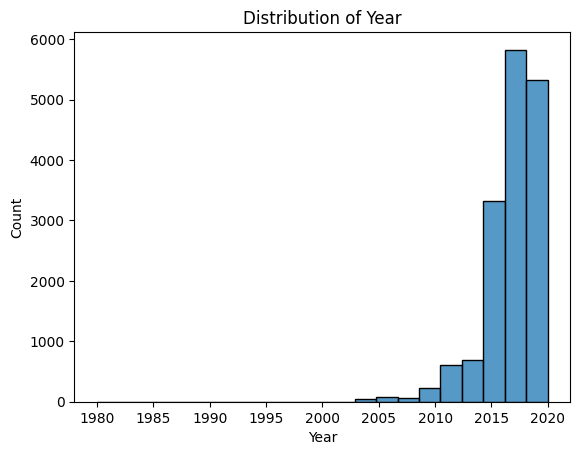

In [133]:
# Distribution of Year
sns.histplot(df['Year'], bins=21)
plt.title('Distribution of Year')
plt.show()

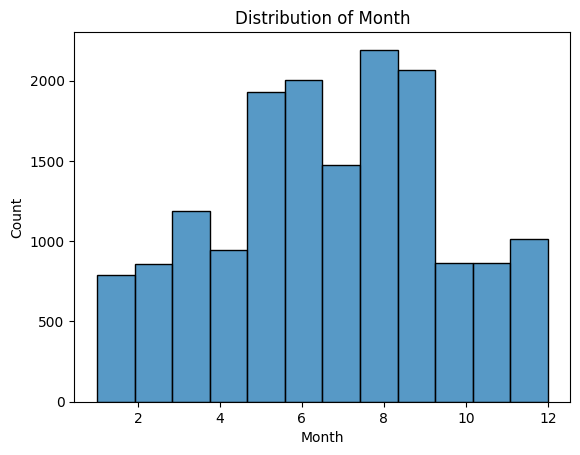

In [134]:
# Distribution of Month
sns.histplot(df['Month'], bins=12)
plt.title('Distribution of Month')
plt.show()


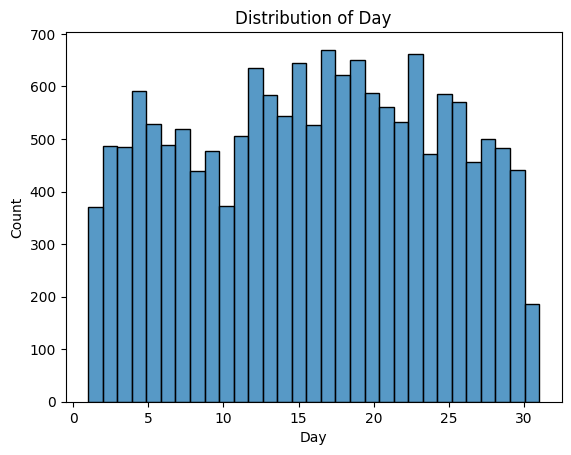

In [135]:
# Distribution of Day
sns.histplot(df['Day'], bins=31)
plt.title('Distribution of Day')
plt.show()

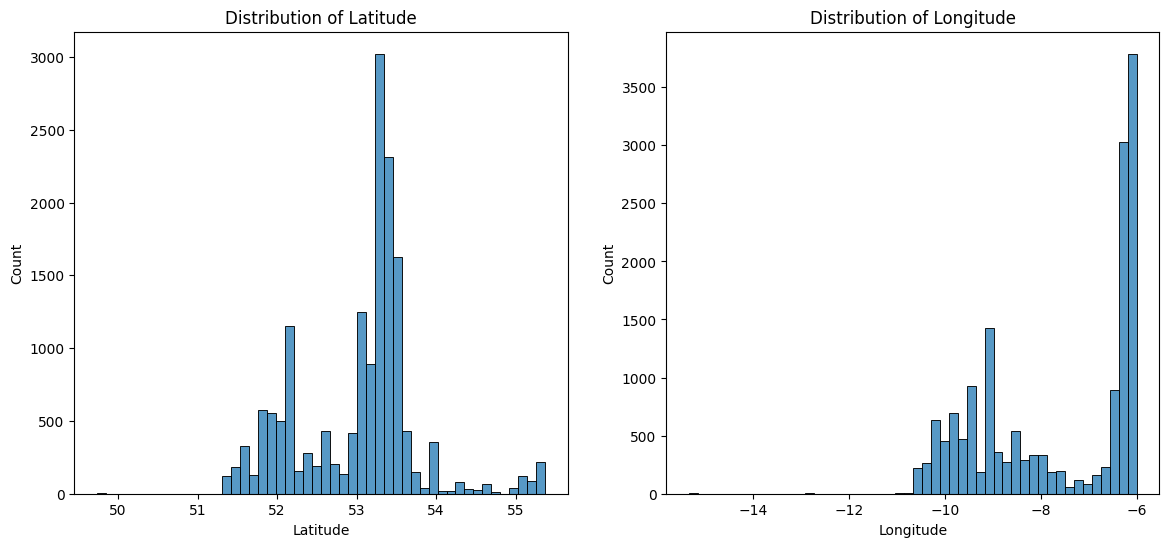

In [136]:
# Distribution of Latitude and Longitude
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.histplot(df['Latitude'], bins=50)
plt.title('Distribution of Latitude')

plt.subplot(1, 2, 2)
sns.histplot(df['Longitude'], bins=50)
plt.title('Distribution of Longitude')

plt.show()

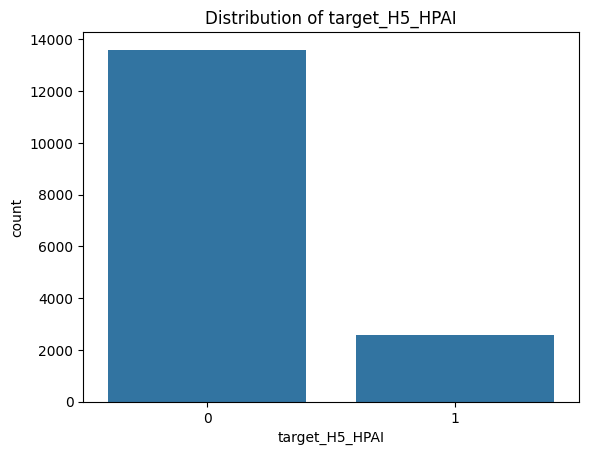

In [137]:
# Distribution of target_H5_HPAI
sns.countplot(x='target_H5_HPAI', data=df)
plt.title('Distribution of target_H5_HPAI')
plt.show()

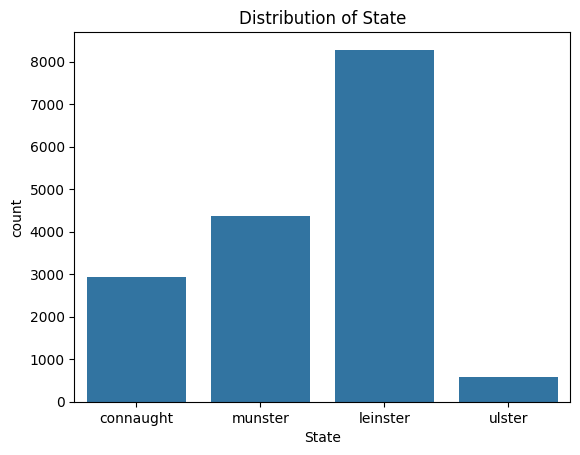

In [138]:
# Distribution of State
sns.countplot(x='State', data=df)
plt.title('Distribution of State')
plt.show()

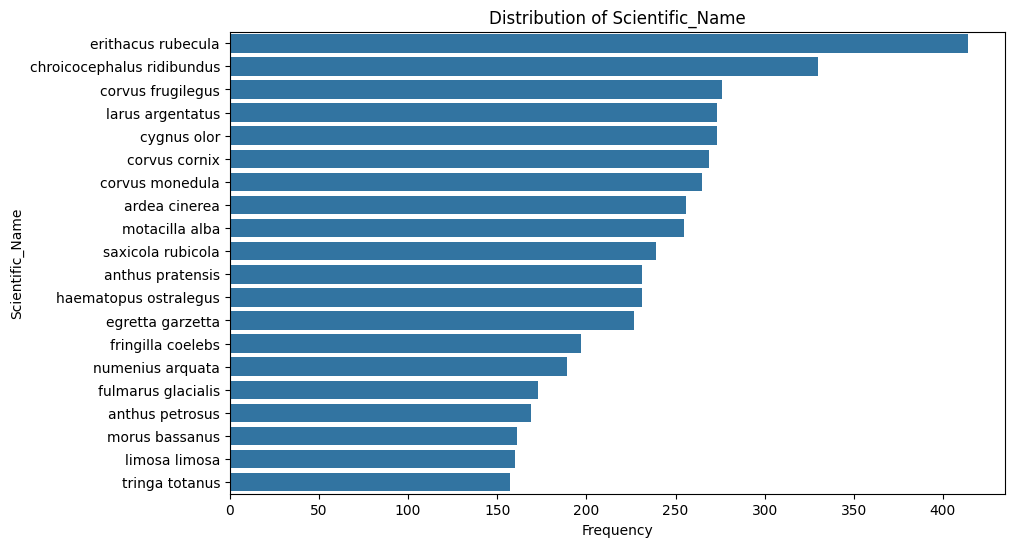

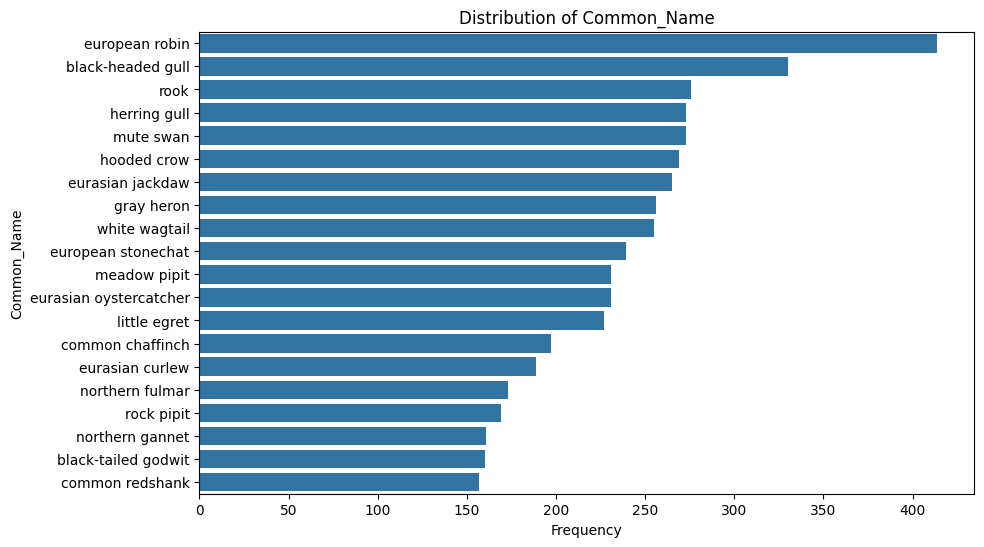

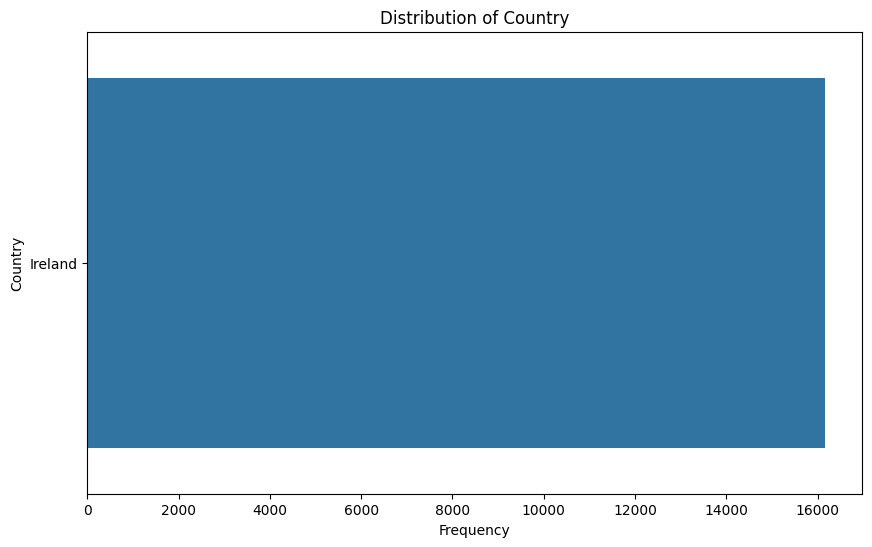

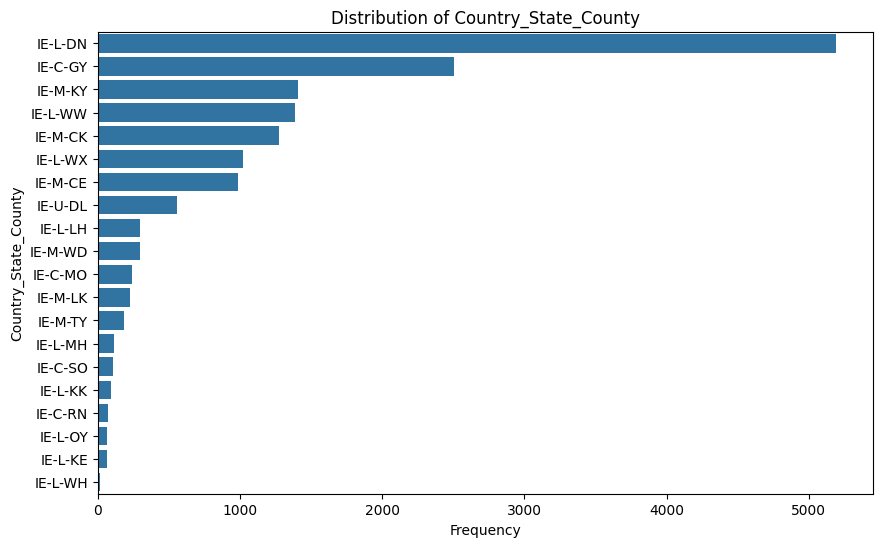

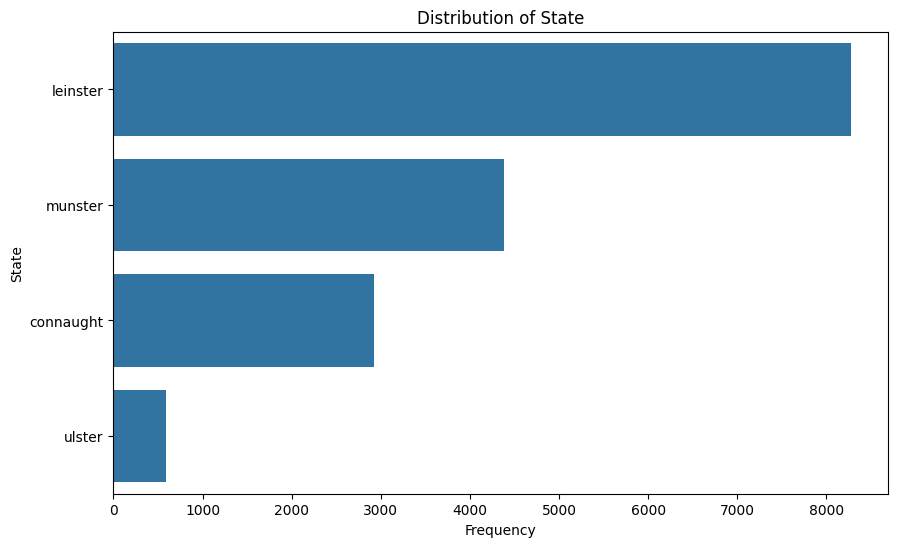

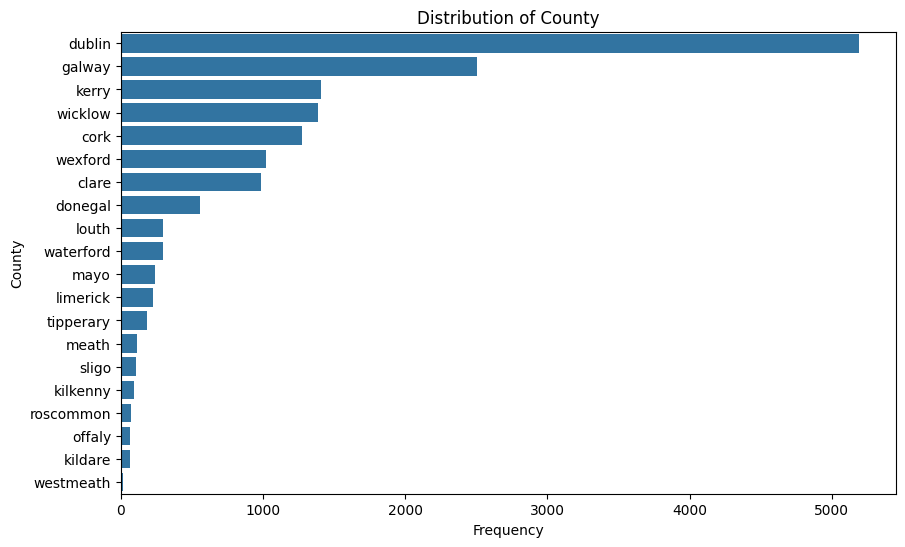

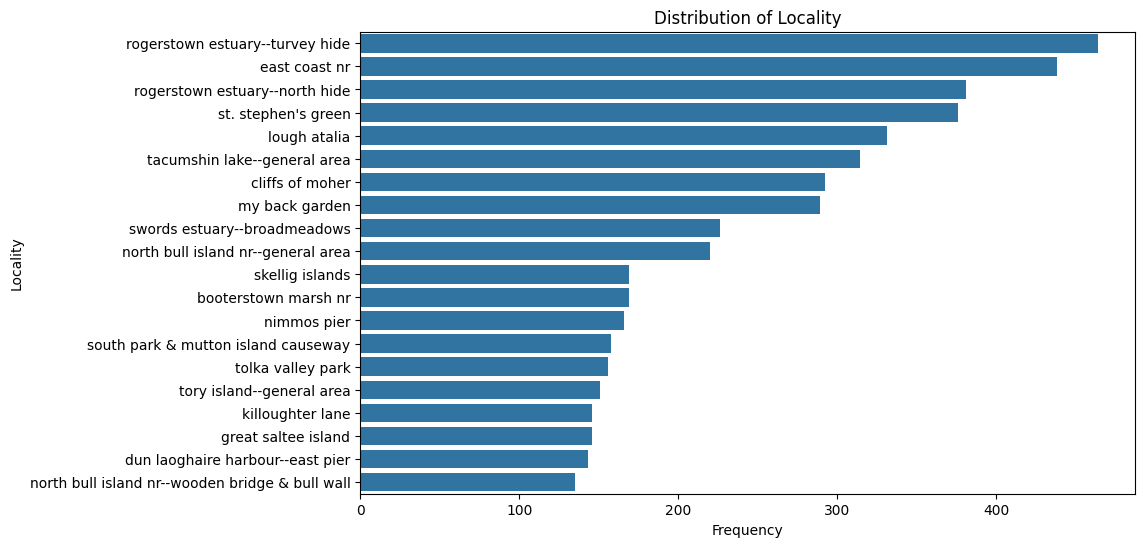

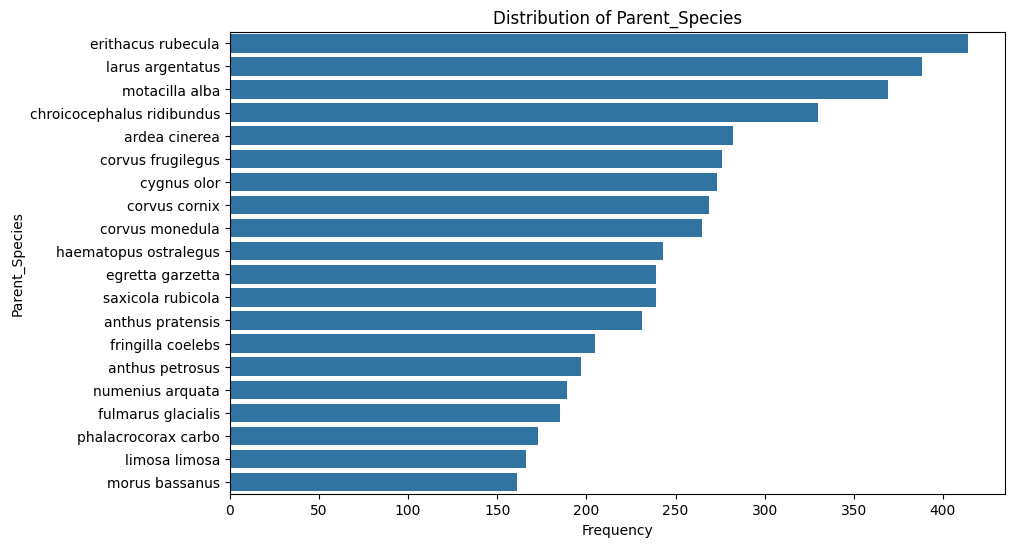

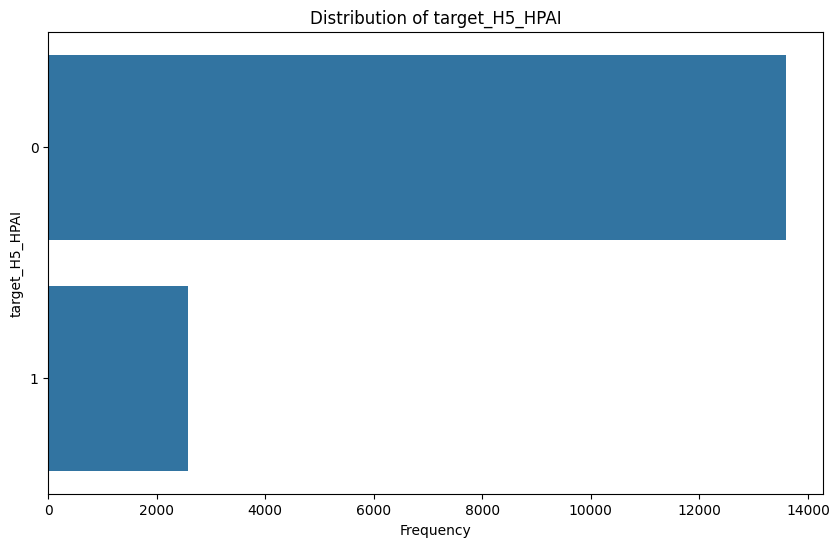

In [139]:
# Plotting count plots for categorical features
categorical_features = ['Scientific_Name', 'Common_Name', 'Country', 'Country_State_County', 'State', 'County', 'Locality', 'Parent_Species', 'target_H5_HPAI']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[feature], order=df[feature].value_counts().index[:20])
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Frequency')
    plt.ylabel(feature)
    plt.show()


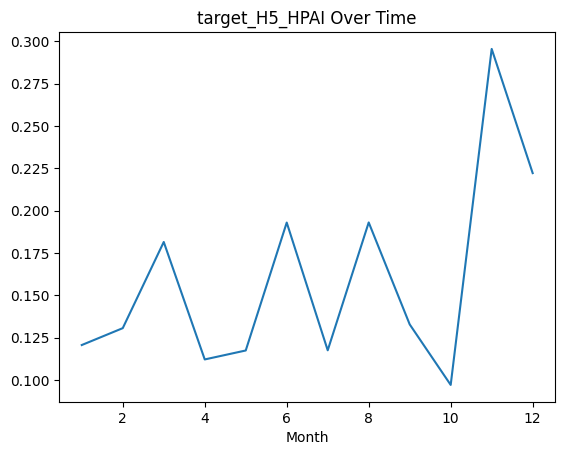

In [140]:
# Plot target_H5_HPAI over time
df.groupby('Month')['target_H5_HPAI'].mean().plot()
plt.title('target_H5_HPAI Over Time')
plt.show()

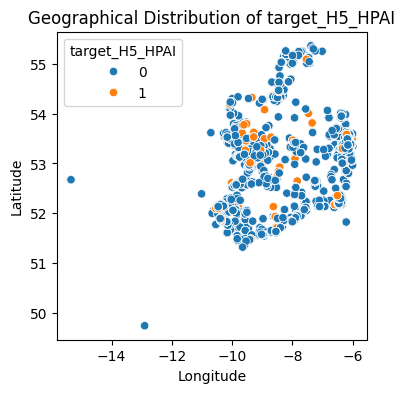

In [141]:
# Scatter plot for Latitude, Longitude colored by target_H5_HPAI
plt.figure(figsize=(4, 4))
sns.scatterplot(x='Longitude', y='Latitude', hue='target_H5_HPAI', data=df)
plt.title('Geographical Distribution of target_H5_HPAI')
plt.show()

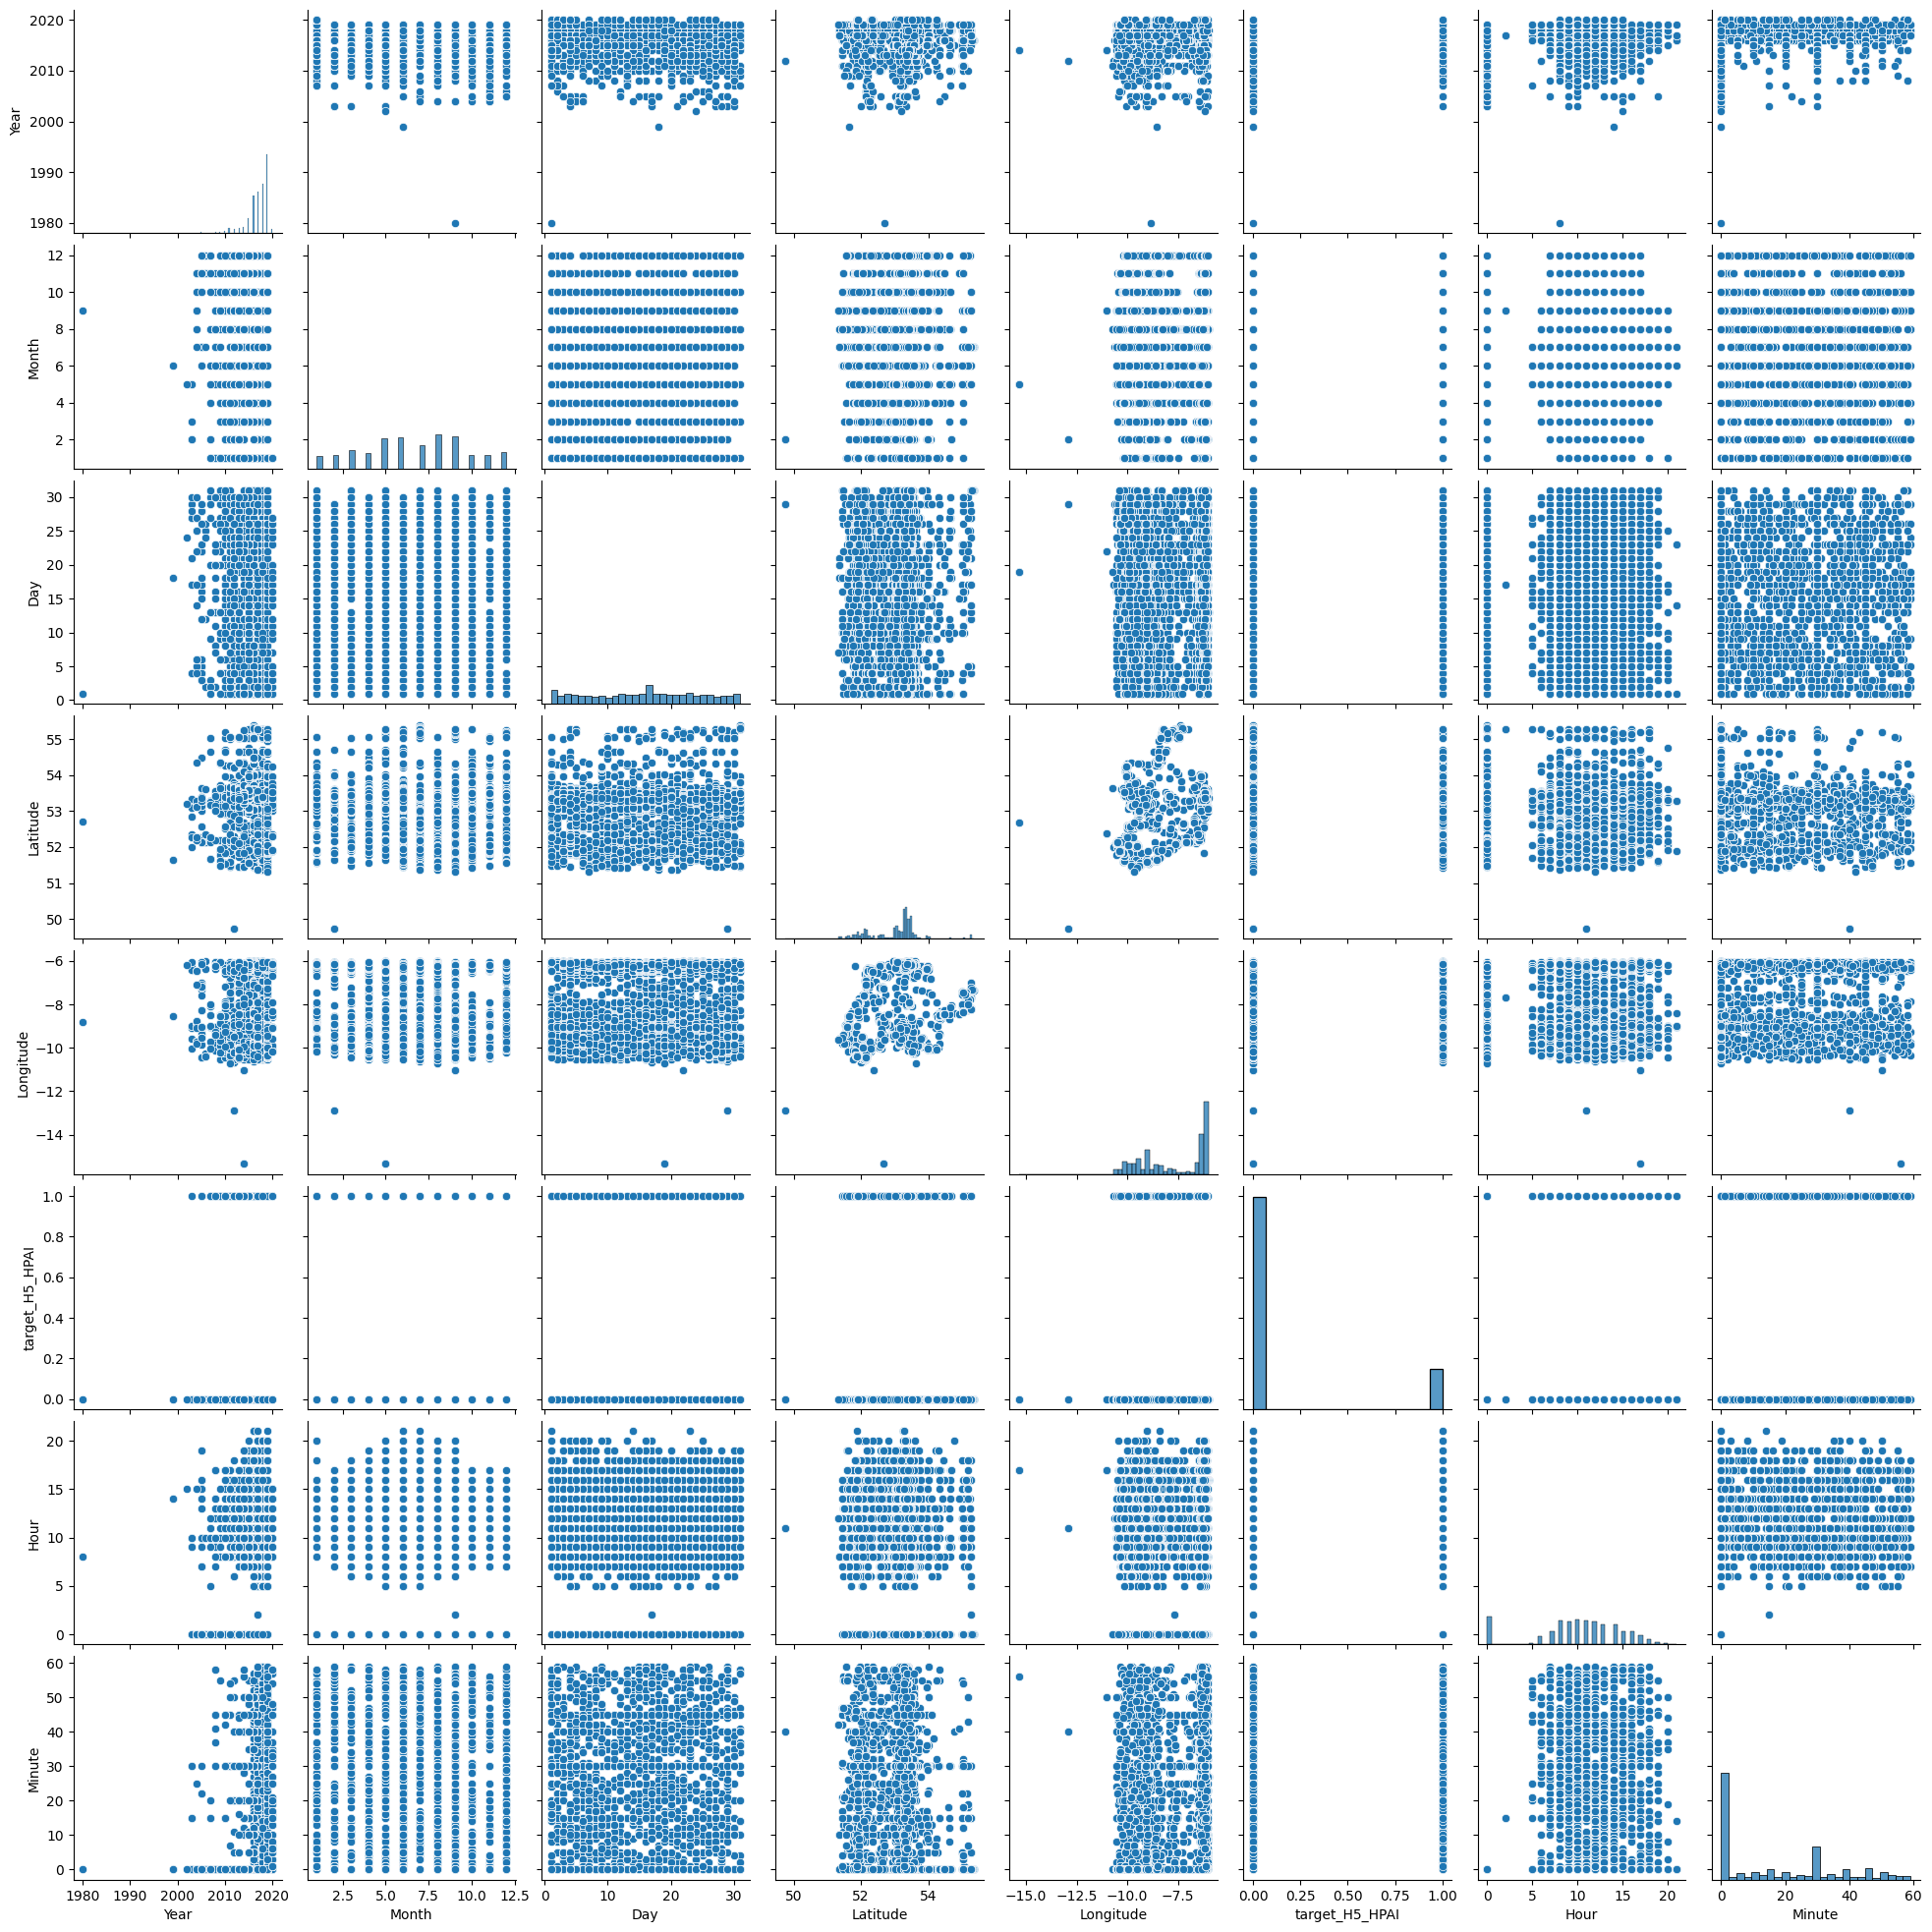

In [142]:
# Pairplot for numerical features
sns.pairplot(df[numerical_columns])
plt.show()

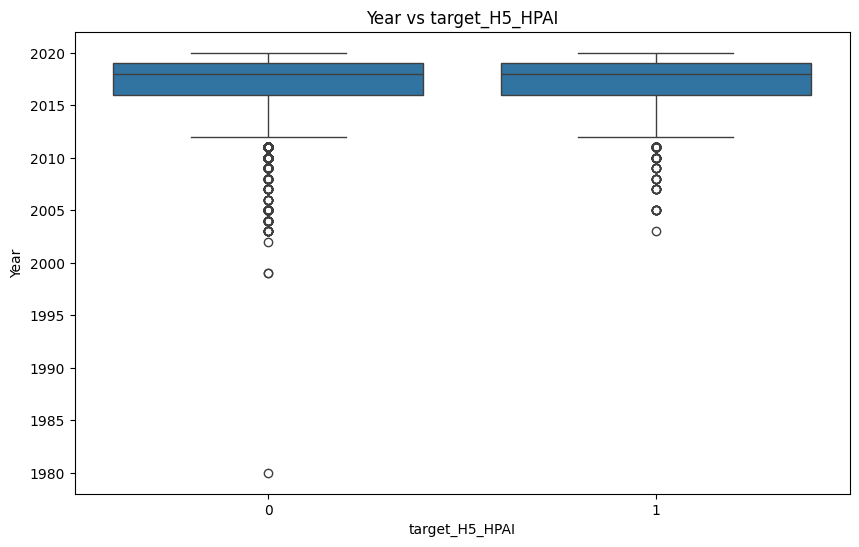

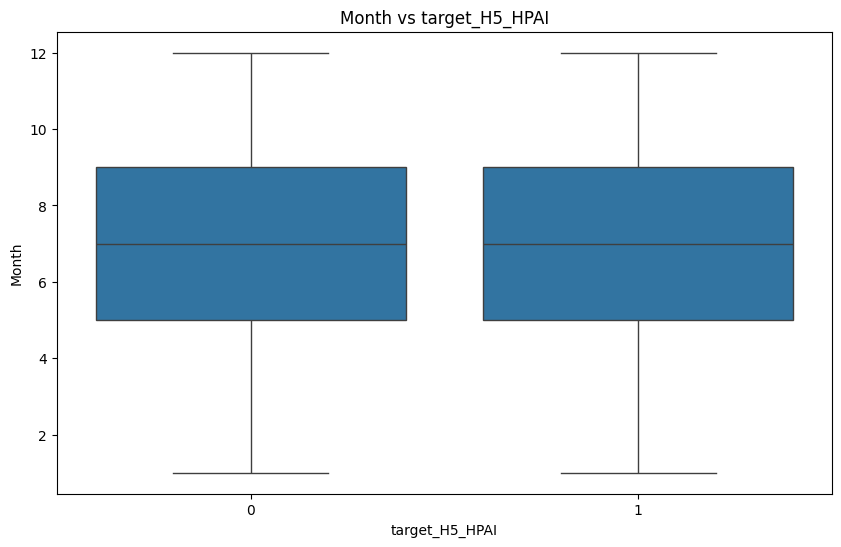

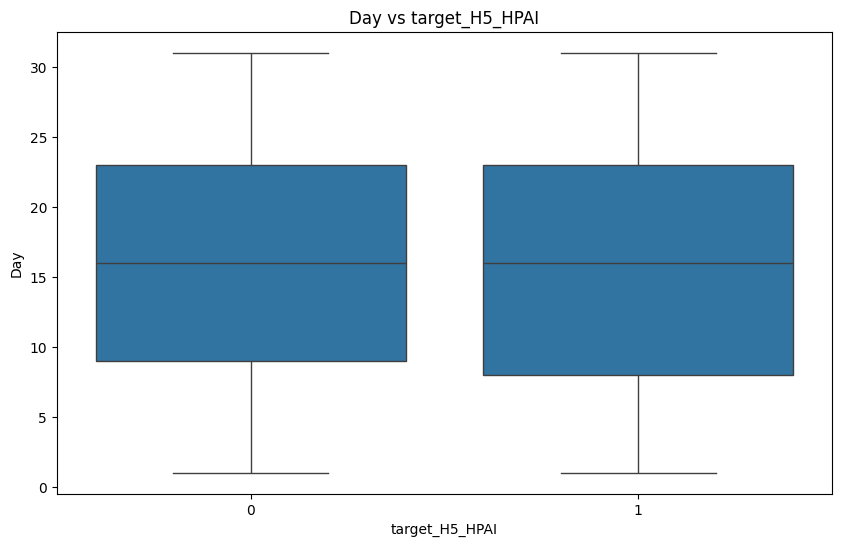

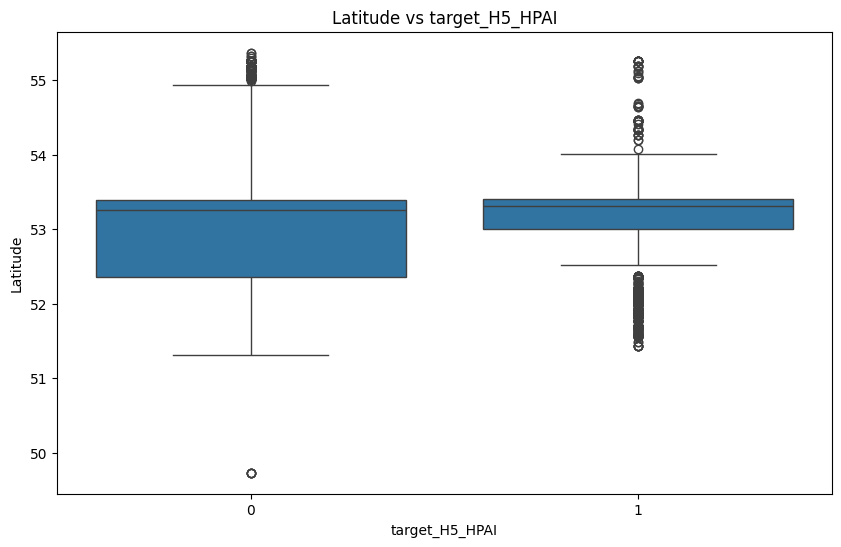

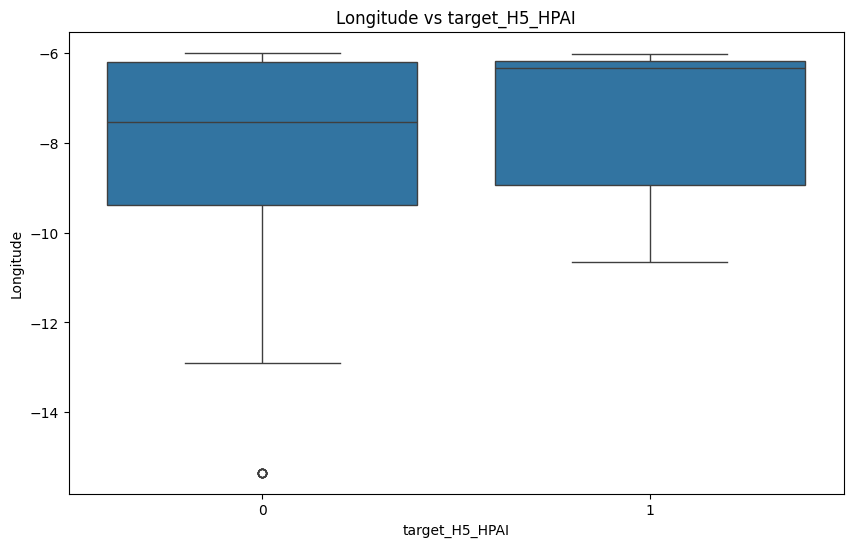

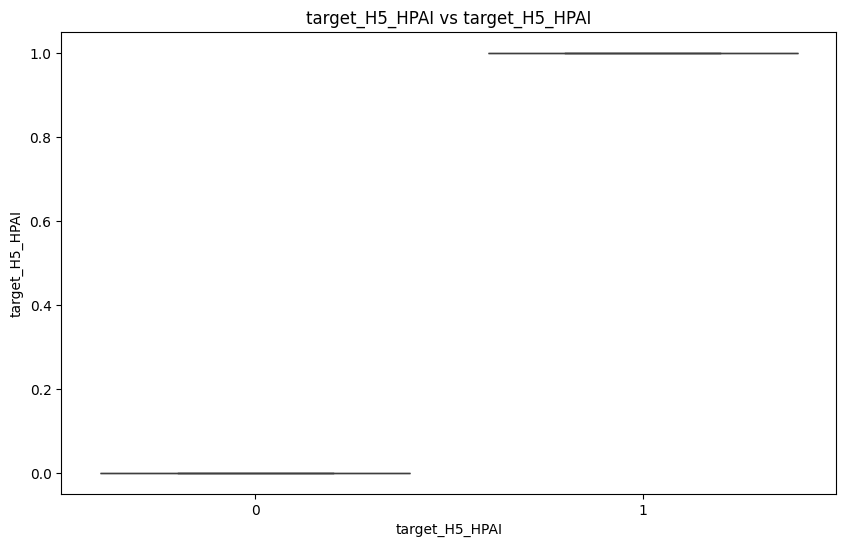

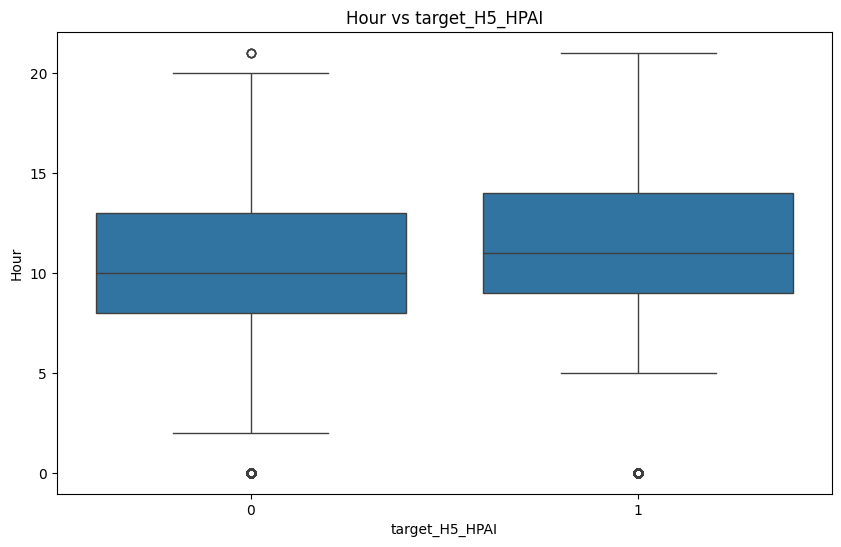

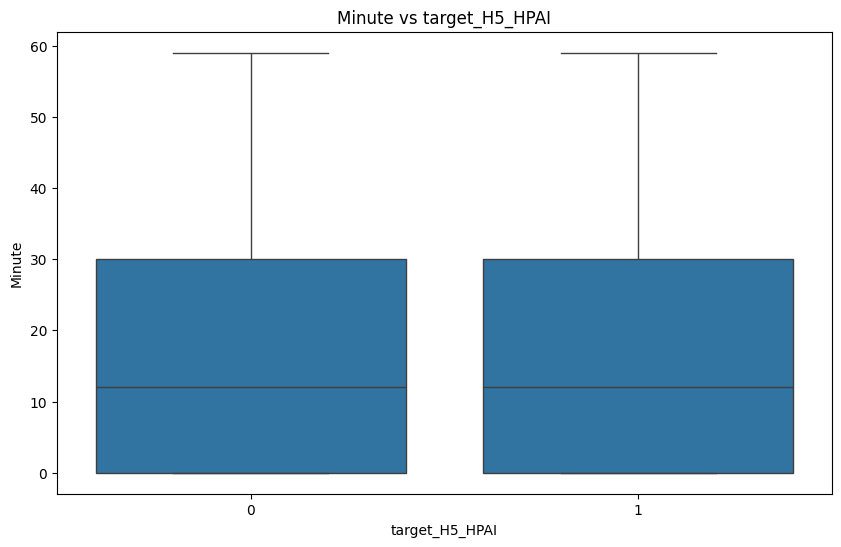

In [143]:
# Box plots for numerical features vs target_H5_HPAI
for feature in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target_H5_HPAI', y=df[feature], data=df)
    plt.title(f'{feature} vs target_H5_HPAI')
    plt.xlabel('target_H5_HPAI')
    plt.ylabel(feature)
    plt.show()

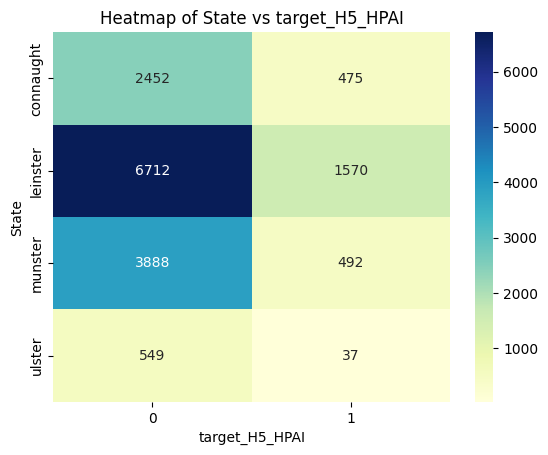

In [144]:
# Crosstab and heatmap for State and target_H5_HPAI
crosstab = pd.crosstab(df['State'], df['target_H5_HPAI'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of State vs target_H5_HPAI')
plt.xlabel('target_H5_HPAI')
plt.ylabel('State')
plt.show()

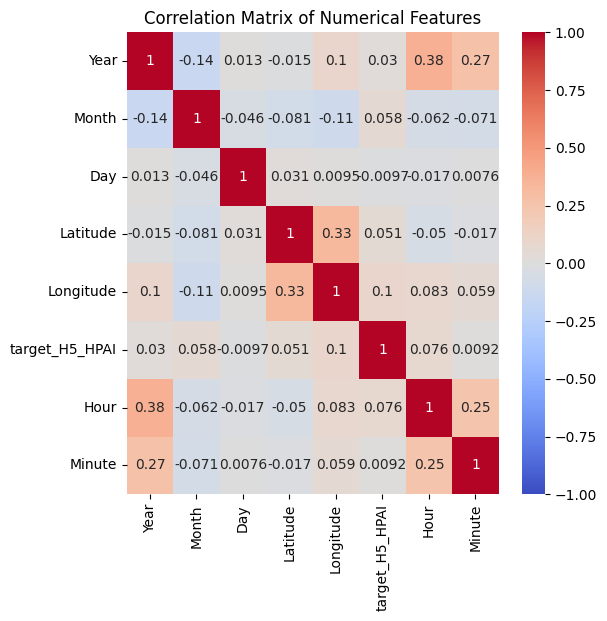

In [145]:
# Correlation matrix for numerical features
plt.figure(figsize=(6, 6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [146]:
df.describe()

Year         Month           Day      Latitude     Longitude  \
count  16175.000000  16175.000000  16175.000000  16175.000000  16175.000000   
mean    2017.016754      6.690015     15.943617     53.026753     -7.693278   
std        2.450732      2.971545      8.439803      0.752326      1.585539   
min     1980.000000      1.000000      1.000000     49.733900    -15.345800   
25%     2016.000000      5.000000      9.000000     52.518100     -9.079650   
50%     2018.000000      7.000000     16.000000     53.267300     -6.924400   
75%     2019.000000      9.000000     23.000000     53.388900     -6.197400   
max     2020.000000     12.000000     31.000000     55.370600     -5.996000   

       target_H5_HPAI          Hour        Minute  
count    16175.000000  16175.000000  16175.000000  
mean         0.159134     10.213168     17.505842  
std          0.365813      4.746544     18.468534  
min          0.000000      0.000000      0.000000  
25%          0.000000      8.000000      0.000000  
50%          0.000000     11.000000     12.000000  
75%          0.000000     14.000000     30.000000  
max          1.000000     21.000000     59.000000

In [147]:
df.describe(include=['O'])

Scientific_Name     Common_Name                 Date   Time  \
count                16175           16175                16175  16175   
unique                 410             410                 1492    621   
top     erithacus rubecula  european robin  2019-05-25T00:00:00   0:00   
freq                   414             414                  107   1804   

        Country Country_State_County     State  County  \
count     16175                16175     16175   16175   
unique        1                   25         4      26   
top     Ireland              IE-L-DN  leinster  dublin   
freq      16175                 5191      8282    5191   

                               Locality      Parent_Species  
count                             16175               16175  
unique                             1276                 338  
top     rogerstown estuary--turvey hide  erithacus rubecula  
freq                                464                 414

In [148]:
# Convert columns to datetime, handling errors
data['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']], errors='coerce')
invalid_dates = df[data['datetime'].isna()]
print(invalid_dates)


Empty DataFrame
Columns: [Scientific_Name, Common_Name, Date, Year, Month, Day, Time, Country, Country_State_County, State, County, Locality, Latitude, Longitude, Parent_Species, target_H5_HPAI, Hour, Minute]
Index: []


<ipython-input-148-936604ffc27b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid_dates = df[data['datetime'].isna()]


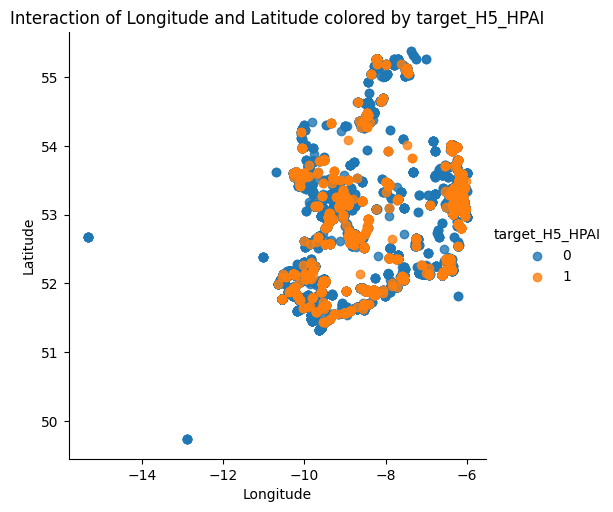

In [149]:
# Interaction plot for multiple features
sns.lmplot(x='Longitude', y='Latitude', hue='target_H5_HPAI', data=df, fit_reg=False)
plt.title('Interaction of Longitude and Latitude colored by target_H5_HPAI')
plt.show()

In [150]:
numerical_columns

Index(['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'target_H5_HPAI',
       'Hour', 'Minute'],
      dtype='object')

In [151]:
!pip install autoviz

  Using cached autoviz-0.1.904-py3-none-any.whl (67 kB)
  Using cached emoji-2.12.1-py3-none-any.whl (431 kB)
  Using cached pyamg-5.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 82.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: bokeh
    Found existing installation: boke

In [152]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [153]:
AV.AutoViz(df)

Shape of your Data Set loaded: (16175, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  4
    Number of NLP String Columns =  2
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    18 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Country']
To fix these data quality issues in the dataset, import

Number of All Scatter Plots = 3
Year could not be indexed. Could not draw date_vars.


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Could not draw wordcloud plot for Time. We need at least 1 word to plot a word cloud, got 0.
All Plots done
Time to run AutoViz = 91 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Scientific_Name           Common_Name               Date          \
_id                                                                          
1      acrocephalus scirpaceus  eurasian reed warbler  2015-09-15T00:00:00   
2      acrocephalus scirpaceus  eurasian reed warbler  2015-09-15T00:00:00   
3            limosa haemastica       hudsonian godwit  2015-09-15T00:00:00   
4            limosa haemastica       hudsonian godwit  2015-09-15T00:00:00   
5            limosa haemastica       hudsonian godwit  2015-09-15T00:00:00   
...                        ...                    ...                  ...   
16300          aythya collaris       ring-necked duck  2020-01-27T00:00:00   
16301          aythya collaris       ring-necked duck  2020-01-27T00:00:00   
16302       larus delawarensis       ring-billed gull  2020-01-27T00:00:00   
16303       larus delawarensis       ring-billed gull  2020-01-27T00:00:00   
16304       larus delawarensis       ring-billed gull  2020-01-27T00:00:00   

       Year  Month  Day  Time  Country  Country_State_County   State     \
_id                                                                       
1      2015    9    15   11:00  Ireland        IE-C-GY        connaught   
2      2015    9    15   11:00  Ireland        IE-C-GY        connaught   
3      2015    9    15   11:00  Ireland        IE-C-GY        connaught   
4      2015    9    15   11:00  Ireland        IE-C-GY        connaught   
5      2015    9    15   11:00  Ireland        IE-C-GY        connaught   
...     ...    ...  ...    ...      ...                  ...        ...   
16300  2020    1    27   12:25  Ireland        IE-C-GY        connaught   
16301  2020    1    27   12:25  Ireland        IE-C-GY        connaught   
16302  2020    1    27   12:25  Ireland        IE-C-GY        connaught   
16303  2020    1    27   12:25  Ireland        IE-C-GY        connaught   
16304  2020    1    27   12:25  Ireland        IE-C-GY        connaught   

       County   Locality    Latitude  Longitude      Parent_Species       \
_id                                                                        
1      galway    inishmore   53.1291   -9.7507   acrocephalus scirpaceus   
2      galway    inishmore   53.1291   -9.7507   acrocephalus scirpaceus   
3      galway    inishmore   53.1291   -9.7507         limosa haemastica   
4      galway    inishmore   53.1291   -9.7507         limosa haemastica   
5      galway    inishmore   53.1291   -9.7507         limosa haemastica   
...       ...          ...       ...        ...                      ...   
16300  galway  omey island   53.5309  -10.1612           aythya collaris   
16301  galway  omey island   53.5309  -10.1612           aythya collaris   
16302  galway  omey island   53.5309  -10.1612        larus delawarensis   
16303  galway  omey island   53.5309  -10.1612        larus delawarensis   
16304  galway  omey island   53.5309  -10.1612        larus delawarensis   

       target_H5_HPAI  Hour  Minute  
_id                                  
1             0         11      0    
2             0         11      0    
3             0         11      0    
4             0         11      0    
5             0         11      0    
...               ...   ...     ...  
16300         0         12     25    
16301         0         12     25    
16302         0         12     25    
16303         0         12     25    
16304         0         12     25    

[16175 rows x 18 columns]

In [154]:
%matplotlib inline

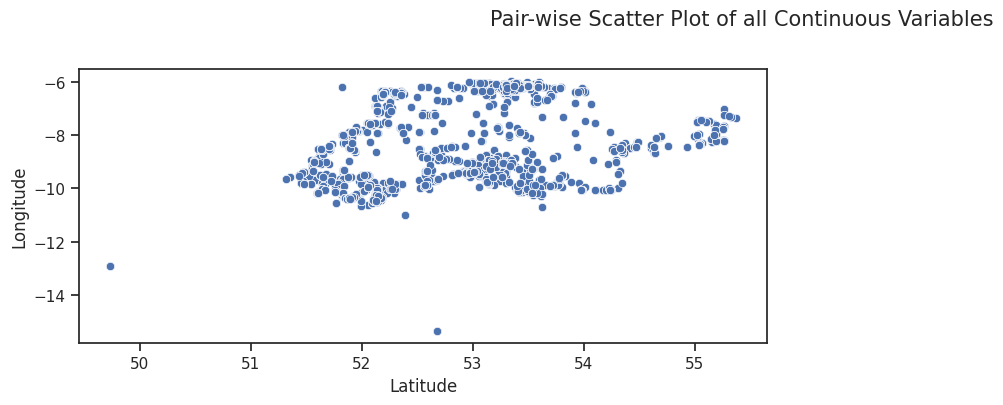

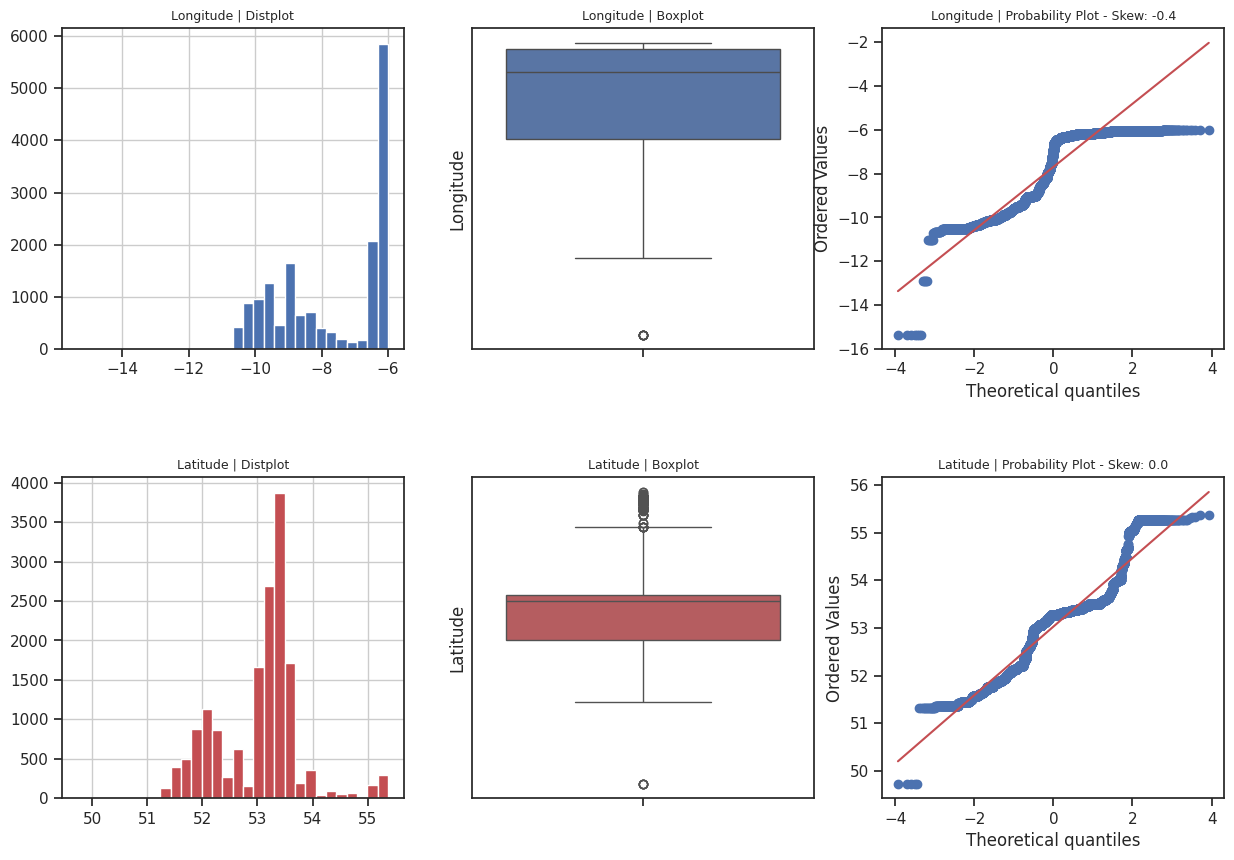

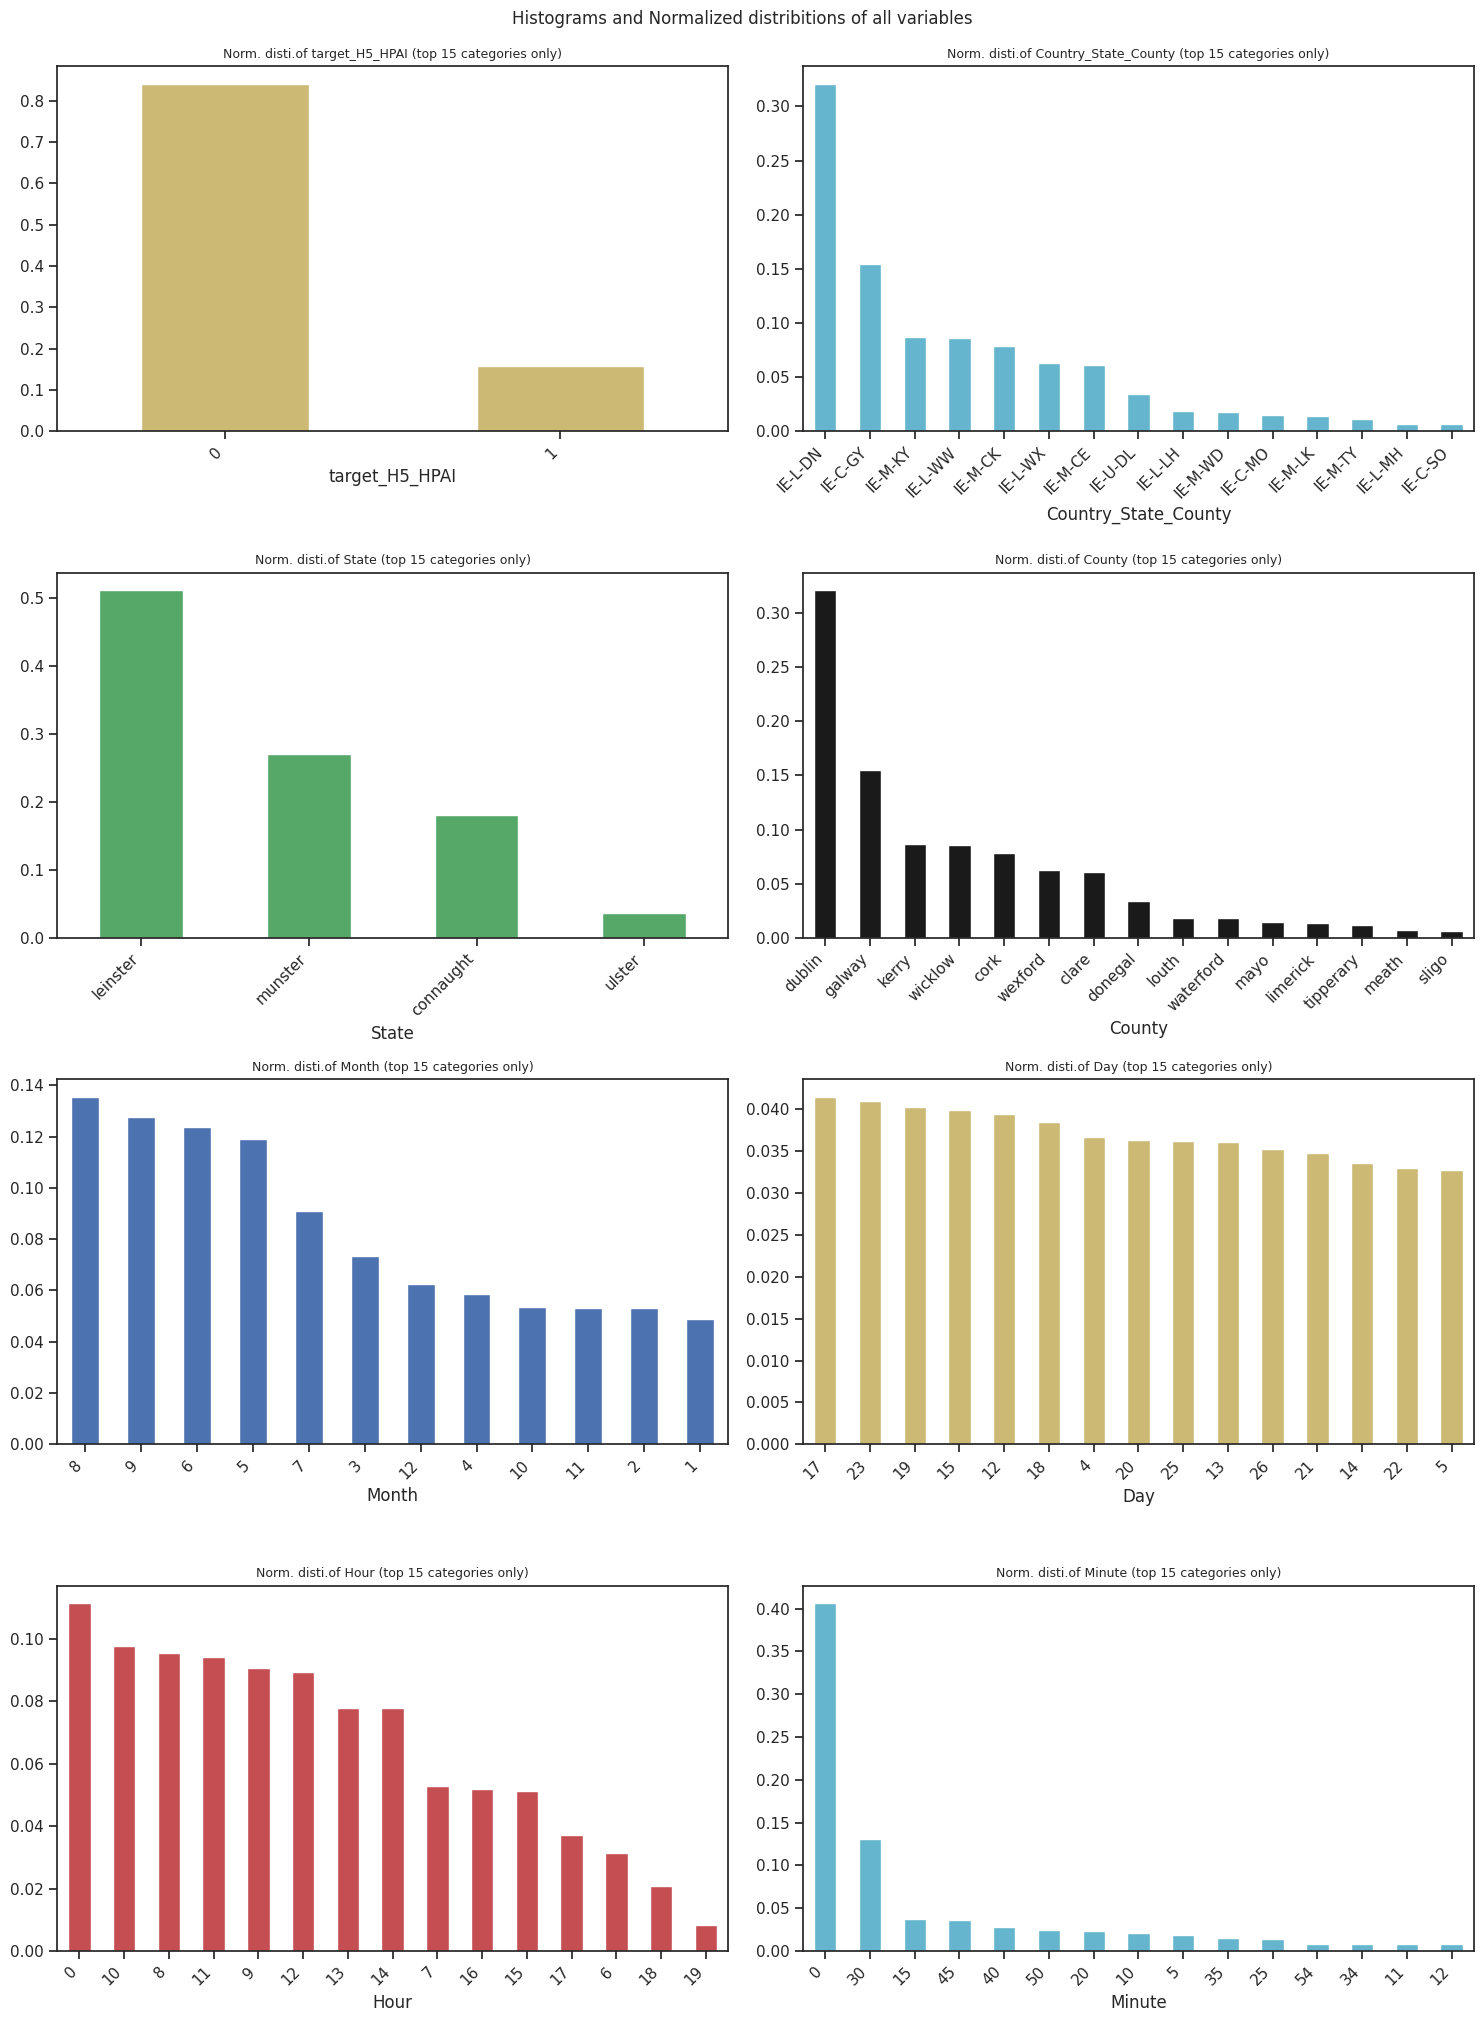

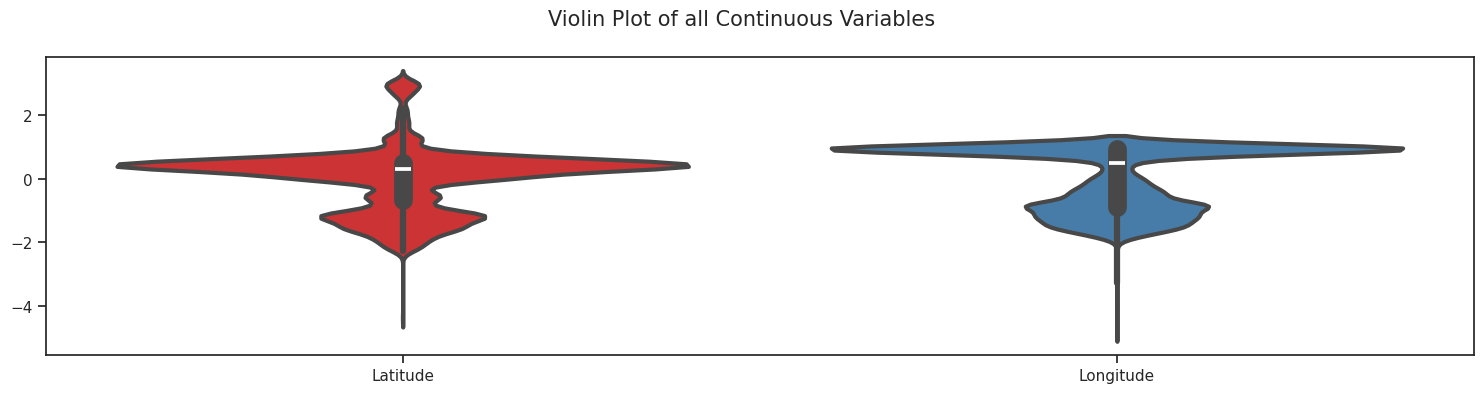

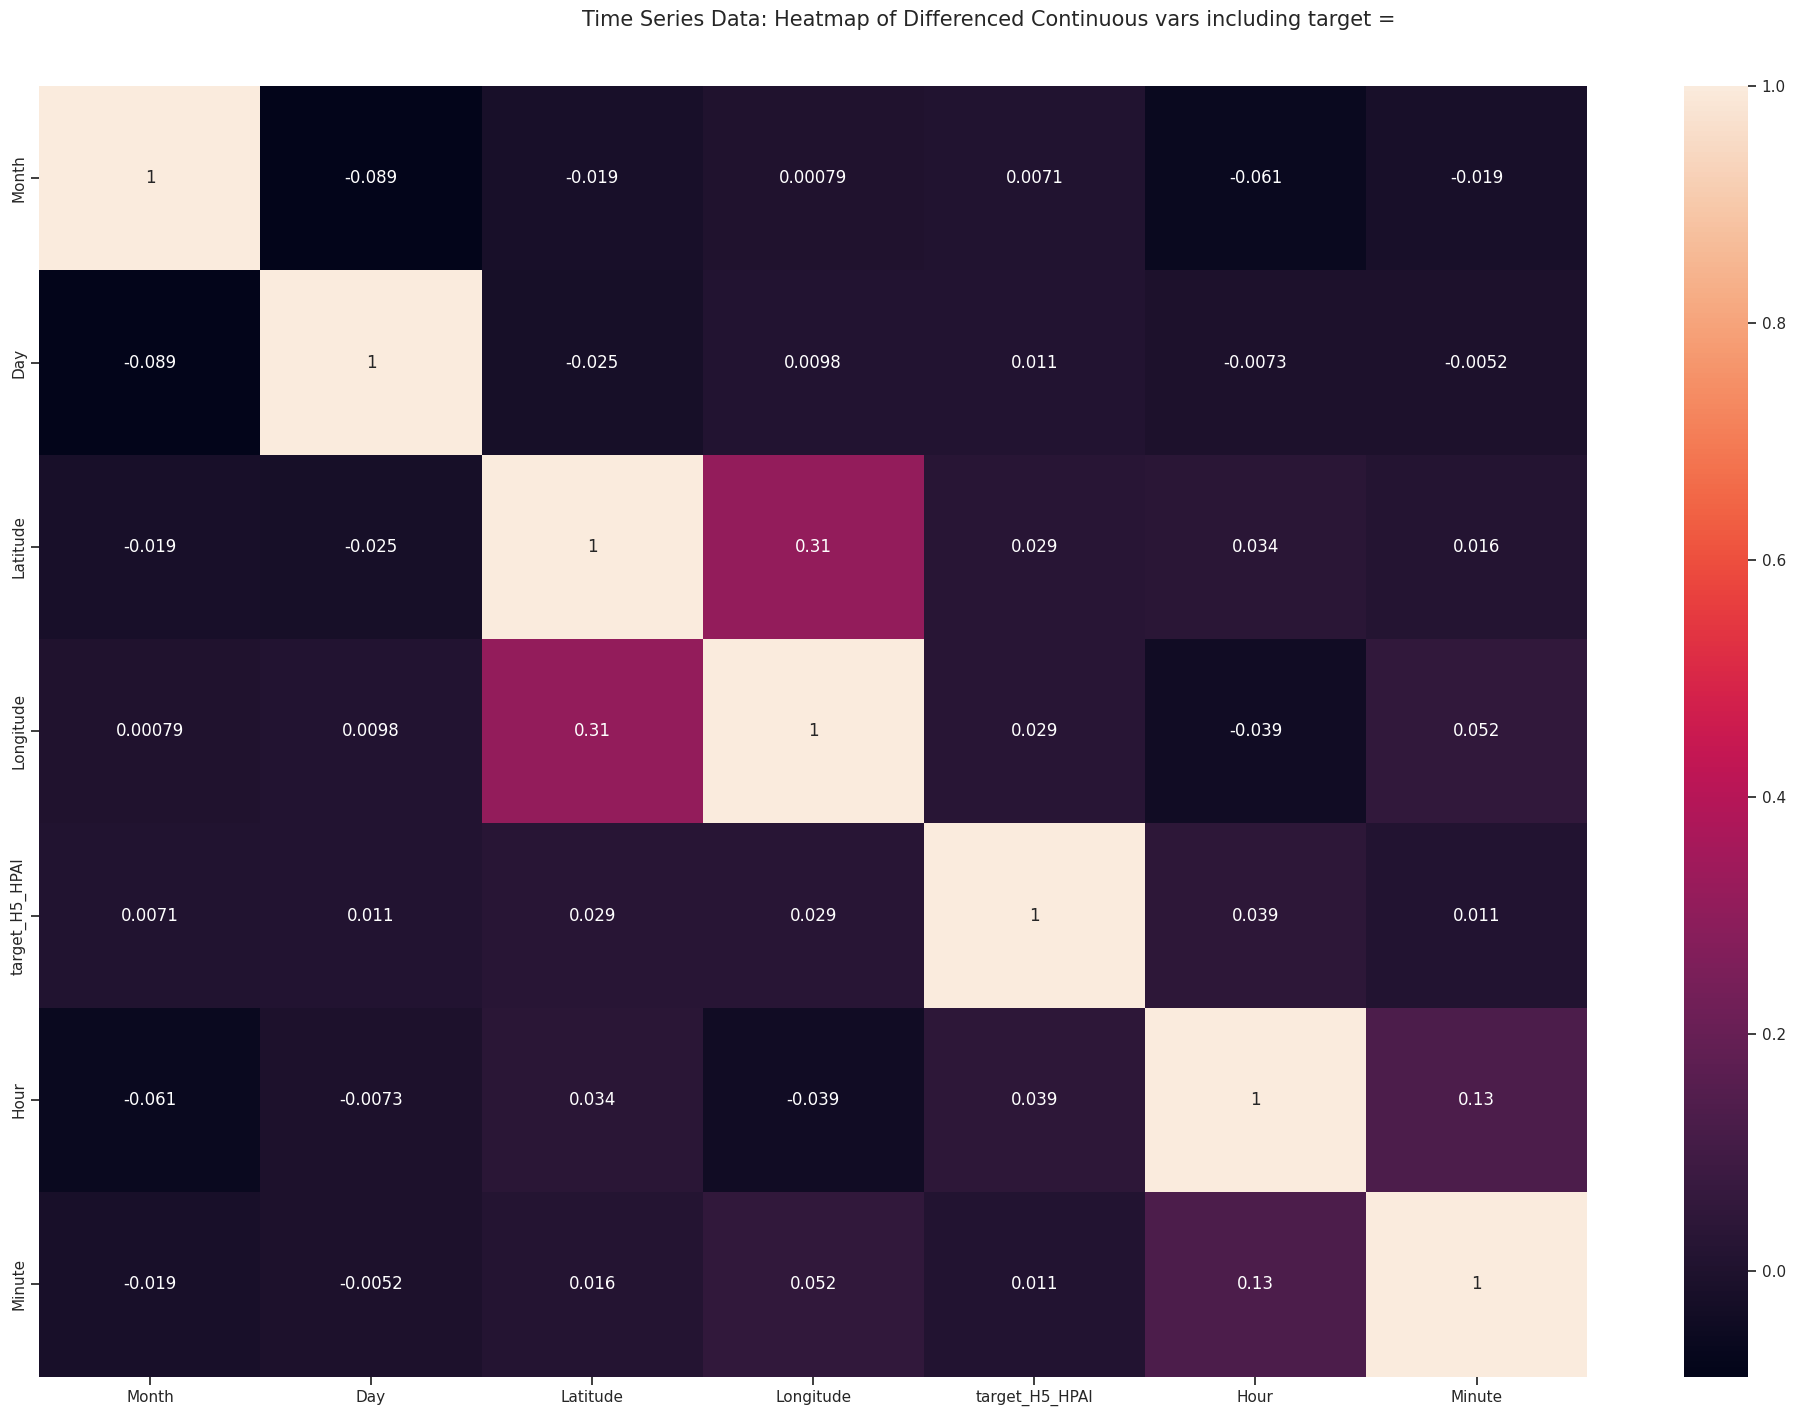

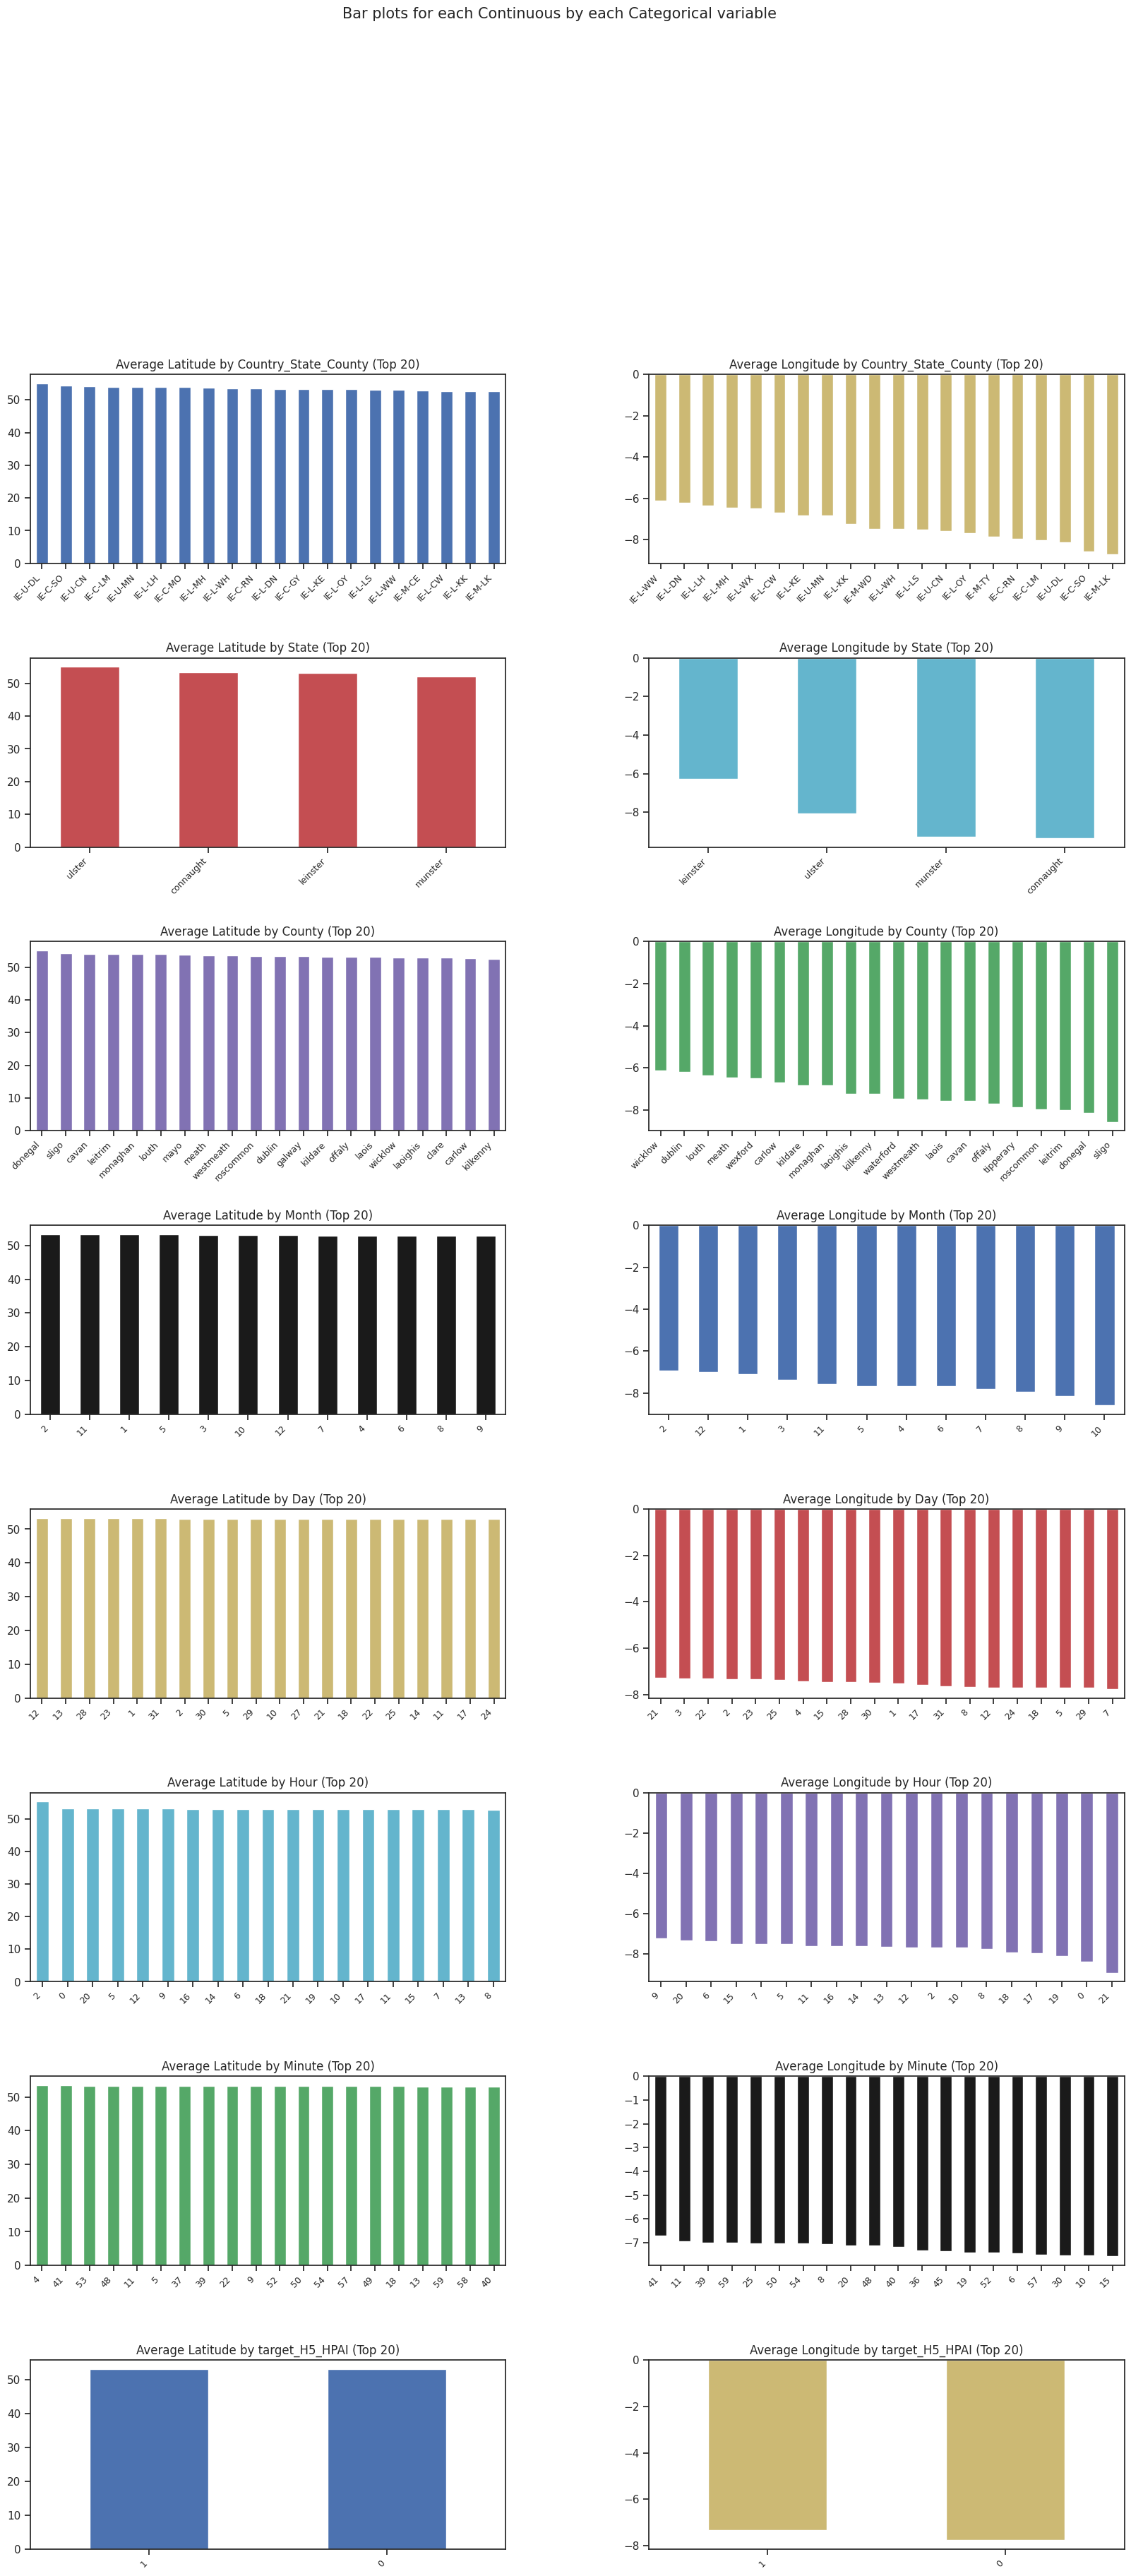

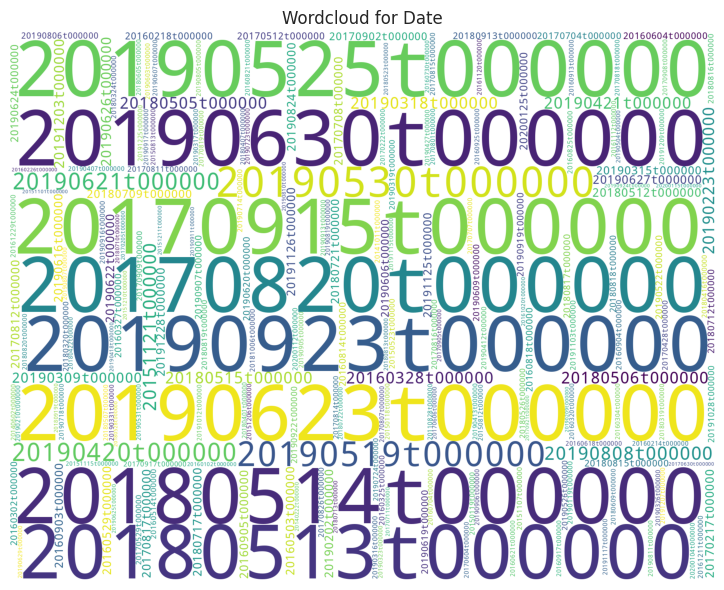

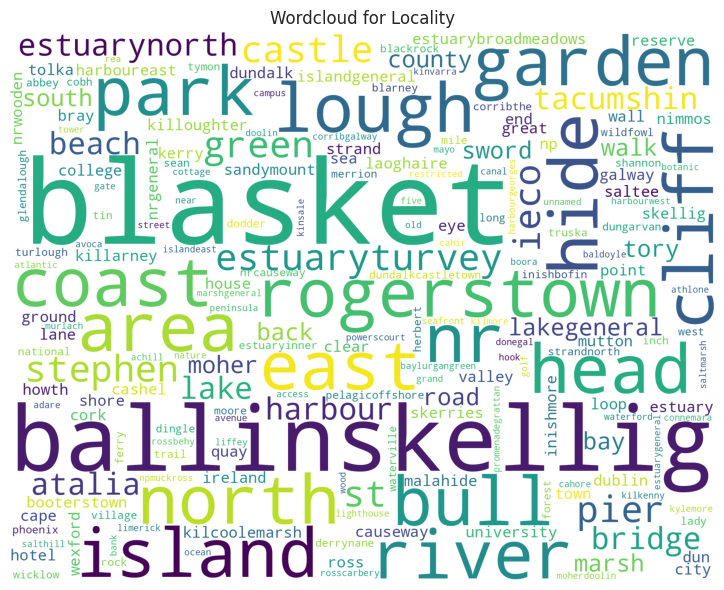

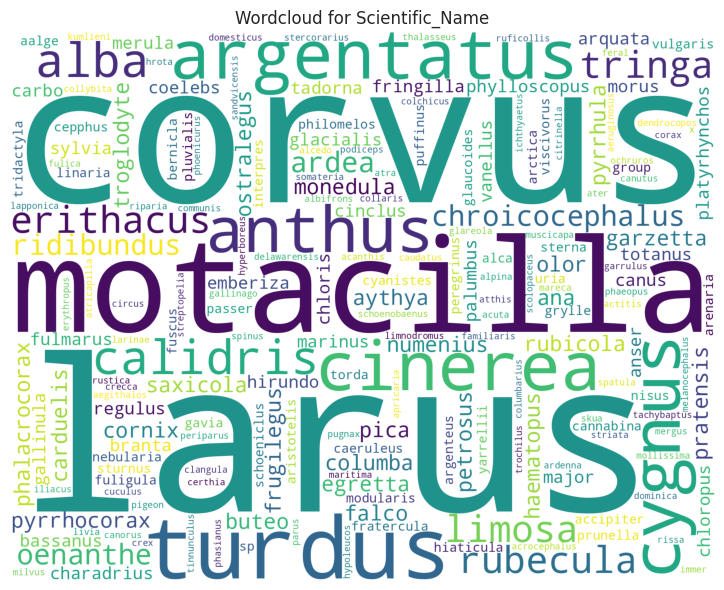

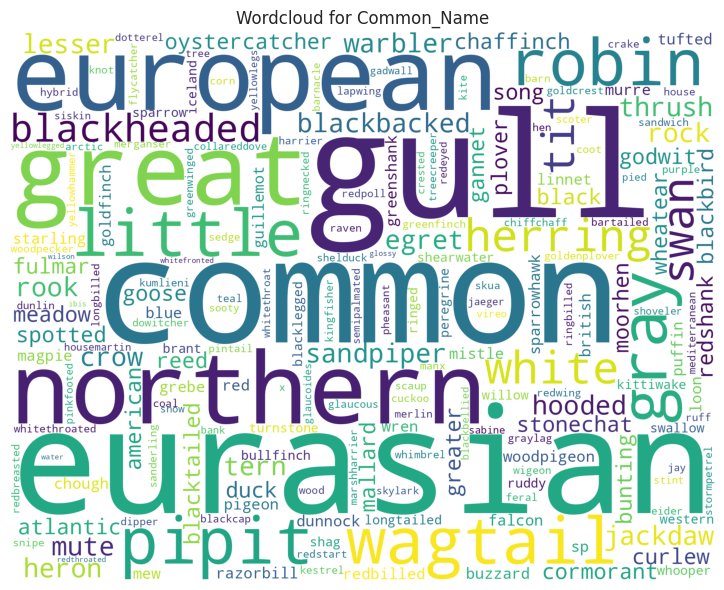

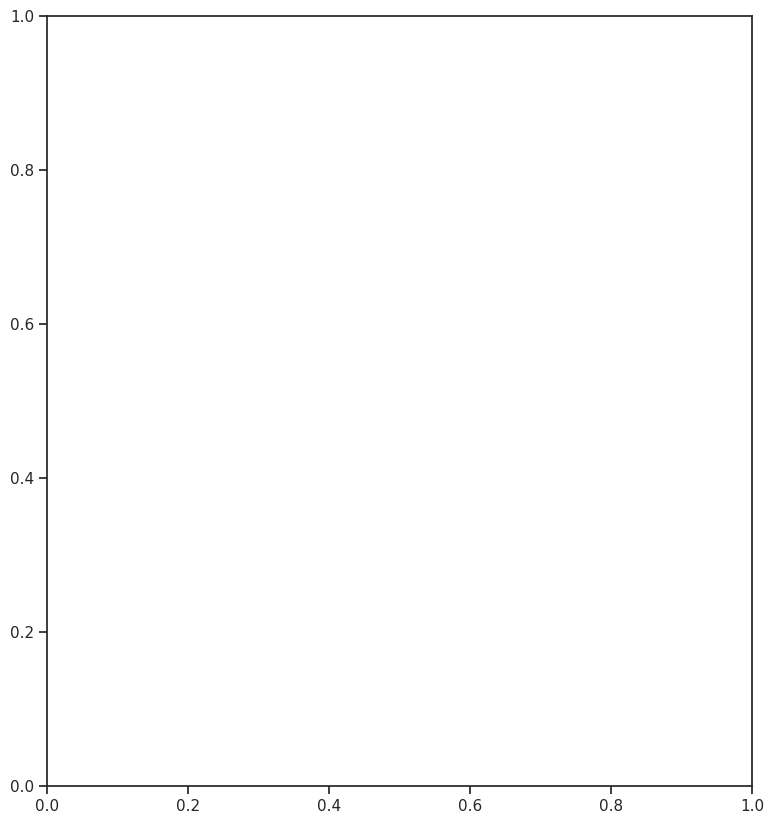

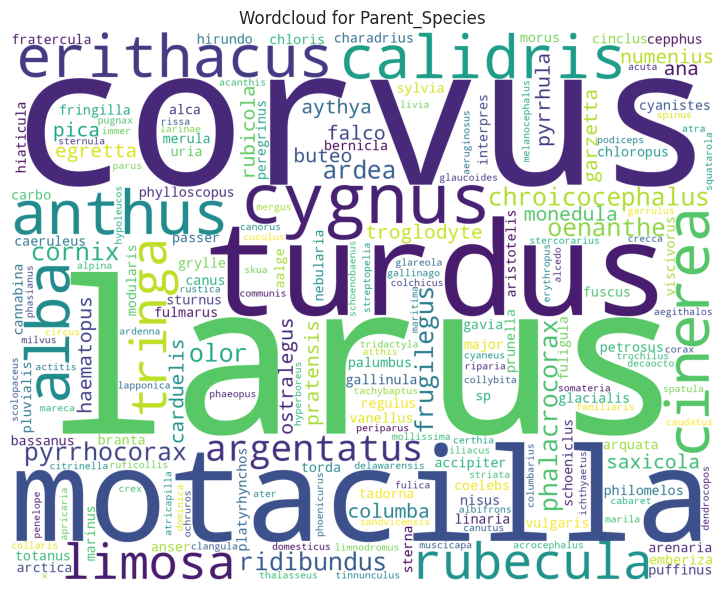

In [155]:
plt.show()

In [156]:
df.drop(['Date', 'Country', 'Time', 'Country_State_County'], axis = 1, inplace = True)

In [157]:
sci_name_le = LabelEncoder().fit(df['Scientific_Name'])
df['Scientific_Name'] = sci_name_le.transform(df['Scientific_Name'])

In [158]:
com_name_le = LabelEncoder().fit(df['Common_Name'])
df['Common_Name'] = com_name_le.transform(df['Common_Name'])

In [159]:
state_le = LabelEncoder().fit(df['State'])
df['State'] = state_le.transform(df['State'])

In [160]:
county_le = LabelEncoder().fit(df['County'])
df['County'] = county_le.transform(df['County'])

In [161]:
loc_le = LabelEncoder().fit(df['Locality'])
df['Locality'] = loc_le.transform(df['Locality'])

In [162]:
par_spec_le = LabelEncoder().fit(df['Parent_Species'])
df['Parent_Species'] = par_spec_le.transform(df['Parent_Species'])

In [163]:
X = df.drop(['target_H5_HPAI'], axis = 1)
y = df['target_H5_HPAI']

In [164]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [166]:
y_train.value_counts()

target_H5_HPAI
0    10873
1     2067
Name: count, dtype: int64

In [167]:
smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [168]:
y_train.value_counts()

target_H5_HPAI
0    10873
1    10873
Name: count, dtype: int64

In [169]:
state = pd.DataFrame(scaler.inverse_transform(X_scaled), columns = X.columns)[['State']]
state.value_counts()

State
1.0      8282
2.0      4380
0.0      2927
3.0       586
Name: count, dtype: int64

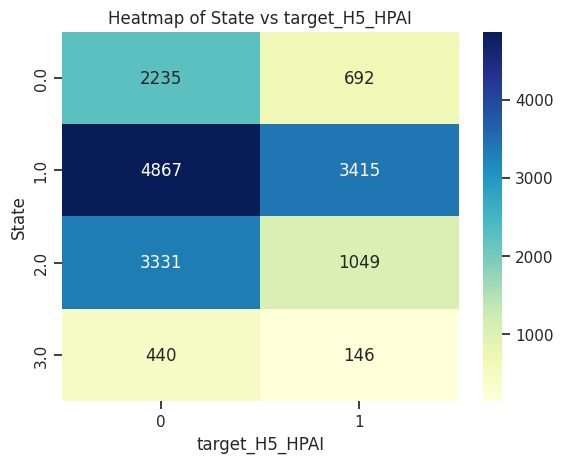

In [170]:
# Crosstab and heatmap for State and target_H5_HPAI
crosstab = pd.crosstab(state['State'], y_train)
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of State vs target_H5_HPAI')
plt.xlabel('target_H5_HPAI')
plt.ylabel('State')
plt.show()

In [171]:
dt  = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [172]:
dt_pred = dt.predict(X_test)

In [173]:
accuracy_score(y_test, dt_pred)

0.9885625965996909

In [174]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2728
           1       0.95      0.98      0.96       507

    accuracy                           0.99      3235
   macro avg       0.97      0.99      0.98      3235
weighted avg       0.99      0.99      0.99      3235



In [175]:
print(confusion_matrix(y_test, dt_pred))

[[2699   29]
 [   8  499]]


In [176]:
dt.feature_importances_

array([0.22647854, 0.29265573, 0.01963202, 0.00548692, 0.00821856,
       0.00152073, 0.00807901, 0.00622953, 0.01493312, 0.04556663,
       0.35975115, 0.00751896, 0.0039291 ])

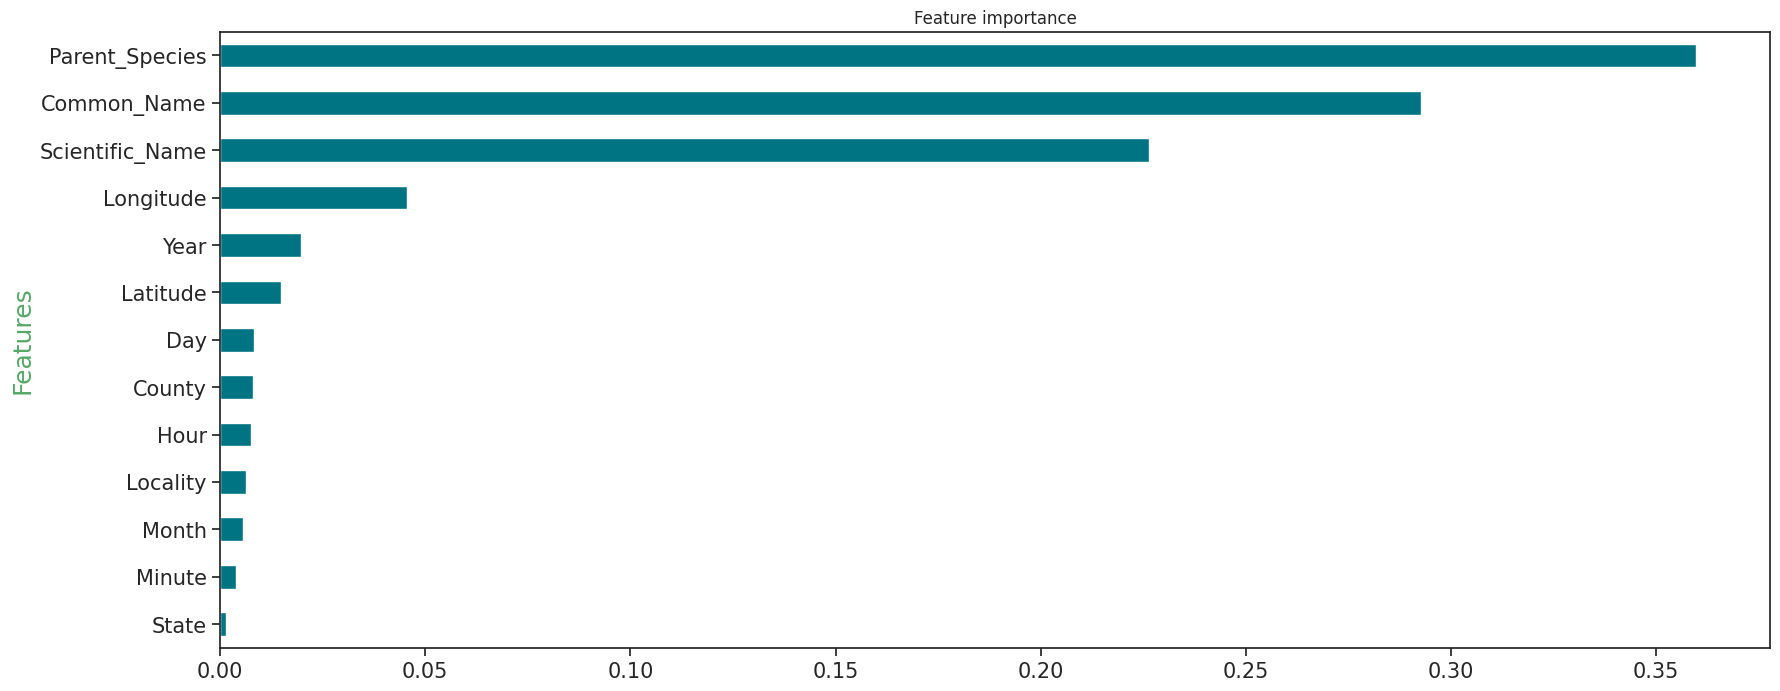

In [177]:
importance = pd.Series(dt.feature_importances_,index=X_train.columns).sort_values()

#initializing plot
ax = importance.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Feature importance')

#x-label
ax.set_ylabel('Features', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(20, 8)

#shwoing the plot
plt.show()

In [178]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [179]:
rf_y_pred = rf.predict(X_test)

In [180]:
rf.score(X_train, y_train)

1.0

In [181]:
accuracy_score(y_test, rf_y_pred)

0.9867078825347759

In [182]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2728
           1       0.95      0.97      0.96       507

    accuracy                           0.99      3235
   macro avg       0.97      0.98      0.98      3235
weighted avg       0.99      0.99      0.99      3235



In [183]:
confusion_matrix(y_test, rf_y_pred)

array([[2701,   27],
       [  16,  491]])

In [184]:
test_sample = data.loc[data['target_H5_HPAI'] == 1]

In [185]:
test_sample = data.copy()

In [186]:
test_sample.dropna(inplace = True)

In [187]:
test_sample.head()

Scientific_Name           Common_Name               Date          \
_id                                                                        
1    Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
2    Acrocephalus scirpaceus  Eurasian Reed Warbler  2015-09-15T00:00:00   
3          Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
4          Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   
5          Limosa haemastica       Hudsonian Godwit  2015-09-15T00:00:00   

     Year  Month  Day  Time Country  Country_State_County   State     County  \
_id                                                                            
1    2015    9    15   1100  Ireland        IE-C-GY        Connaught  Galway   
2    2015    9    15   1100  Ireland        IE-C-GY        Connaught  Galway   
3    2015    9    15   1100  Ireland        IE-C-GY        Connaught  Galway   
4    2015    9    15   1100  Ireland        IE-C-GY        Connaught  Galway   
5    2015    9    15   1100  Ireland        IE-C-GY        Connaught  Galway   

           Locality        Latitude  Longitude      Parent_Species       \
_id                                                                       
1    Inishmore (Inis M�r)   53.1291  -9.7507    Acrocephalus scirpaceus   
2    Inishmore (Inis M�r)   53.1291  -9.7507    Acrocephalus scirpaceus   
3    Inishmore (Inis M�r)   53.1291  -9.7507          Limosa haemastica   
4    Inishmore (Inis M�r)   53.1291  -9.7507          Limosa haemastica   
5    Inishmore (Inis M�r)   53.1291  -9.7507          Limosa haemastica   

     target_H5_HPAI       datetime       
_id                                      
1           0       2015-09-15 11:00:00  
2           0       2015-09-15 11:00:00  
3           0       2015-09-15 11:00:00  
4           0       2015-09-15 11:00:00  
5           0       2015-09-15 11:00:00

In [188]:
X_scaled.columns

Index(['Scientific_Name', 'Common_Name', 'Year', 'Month', 'Day', 'State',
       'County', 'Locality', 'Latitude', 'Longitude', 'Parent_Species', 'Hour',
       'Minute'],
      dtype='object')

In [189]:
state_le.classes_

array(['connaught', 'leinster', 'munster', 'ulster'], dtype=object)

In [190]:
test_sample['Locality'] = test_sample['Locality'].replace('Inishmore (Inis M�r)','Inishmore')
test_sample['Time'] = test_sample['Time'].apply(change)
test_sample['Hour'] = test_sample['Time'].apply(lambda x : x.split(':')[0])
test_sample['Minute'] = test_sample['Time'].apply(lambda x : x.split(':')[1])
test_sample['Hour'] = test_sample['Hour'].astype('int64')
test_sample['Minute'] = test_sample['Minute'].astype('int64')
test_sample.drop(['Date', 'Country', 'Time', 'Country_State_County'], axis = 1, inplace = True)
test_sample['Scientific_Name'] = sci_name_le.transform(test_sample['Scientific_Name'].str.lower())
test_sample['Common_Name'] = com_name_le.transform(test_sample['Common_Name'].str.lower())
test_sample['State'] = state_le.transform(test_sample['State'].str.lower())

In [193]:
county_le.classes_

array(['carlow', 'cavan', 'clare', 'cork', 'donegal', 'dublin', 'galway',
       'kerry', 'kildare', 'kilkenny', 'laoighis', 'laois', 'leitrim',
       'limerick', 'louth', 'mayo', 'meath', 'monaghan', 'offaly',
       'roscommon', 'sligo', 'tipperary', 'waterford', 'westmeath',
       'wexford', 'wicklow'], dtype=object)

In [199]:
test_sample_X.drop(['datetime'], axis = 1, inplace = True)

In [200]:
test_sample['County'] = county_le.transform(test_sample['County'].str.lower())
test_sample['Locality'] = loc_le.transform(test_sample['Locality'].str.lower())
test_sample['Parent_Species'] = par_spec_le.transform(test_sample['Parent_Species'].str.lower())
test_sample_X = test_sample.drop(['target_H5_HPAI'], axis = 1)
test_sample_X_scaled = pd.DataFrame(scaler.transform(test_sample_X), columns = test_sample_X.columns)

In [201]:
y_hat = rf.predict(test_sample_X_scaled)

In [202]:
np.unique(y_hat, return_counts = True)

(array([0, 1]), array([13590,  2585]))

In [ ]:
np.unique(dt.predict(test_sample_X_scaled), return_counts = True)

In [211]:
tem = ['Ardea cinerea', 'Mute Swan', 2005, 6, 23, 'Munster', 'Clare', 'Ballyvaughan Harbour', 53, -9, 'Cygnus olor', 9, 0]

In [212]:
for i in range(len(tem)):
  if type(tem[i]) == str:
    tem[i] = tem[i].lower()

In [213]:
tem[0] = sci_name_le.transform([tem[0]])[0]
tem[1] = com_name_le.transform([tem[1]])[0]
tem[5] = state_le.transform([tem[5]])[0]
tem[6] = county_le.transform([tem[6]])[0]
tem[7] = loc_le.transform([tem[7]])[0]
tem[10] = par_spec_le.transform([tem[10]])[0]

In [214]:
tem = scaler.transform([tem])

In [215]:
tem1 = ['Ardea cinerea', 'Gray Heron', 2005, 8, 6, 'Munster', 'Clare', "Ballyvaughan Harbour", 53.1192, -9.1532, "Ardea cinerea", 9, 0]

In [216]:
for i in range(len(tem1)) :
  if type(tem1[i]) == str :
    tem1[i] = tem1[i].lower()

In [217]:
tem1[0] = sci_name_le.transform([tem1[0]])[0]
tem1[5] = state_le.transform([tem1[5]])[0]
tem1[6] = county_le.transform([tem1[6]])[0]
tem1[7] = loc_le.transform([tem1[7]])[0]
tem1[10] = par_spec_le.transform([tem1[10]])[0]
tem1[1] = com_name_le.transform([tem1[1]])[0]

In [218]:
tem1 = scaler.transform([tem1])

In [219]:
dt.predict(tem1), rf.predict(tem1)

(array([0]), array([0]))

In [220]:
dt.predict(tem1)

array([0])

In [221]:
rf.predict(tem)

array([0])

In [203]:
import warnings
warnings.filterwarnings("ignore")

In [204]:
def roc_plotting(model,model_name):
  cv = StratifiedKFold(n_splits=10)

  fig1 = plt.figure(figsize=[12,8])
  ax1 = fig1.add_subplot(111,aspect = 'equal')
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X,y):
      model.fit(X.iloc[train].values,y.iloc[train].values)
      prediction = model.predict_proba(X.iloc[test].values)
      fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC For {model_name}')
  plt.legend(loc="lower right")

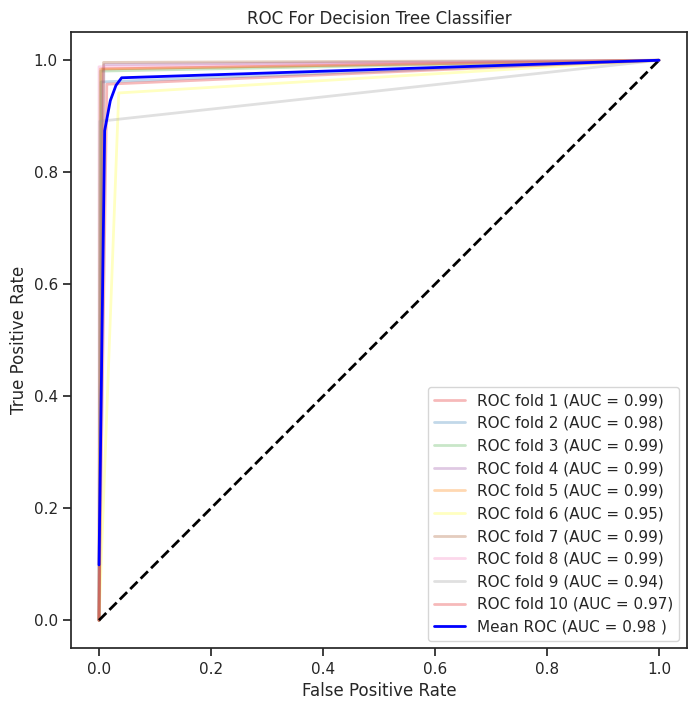

In [205]:
roc_plotting(dt, "Decision Tree Classifier")

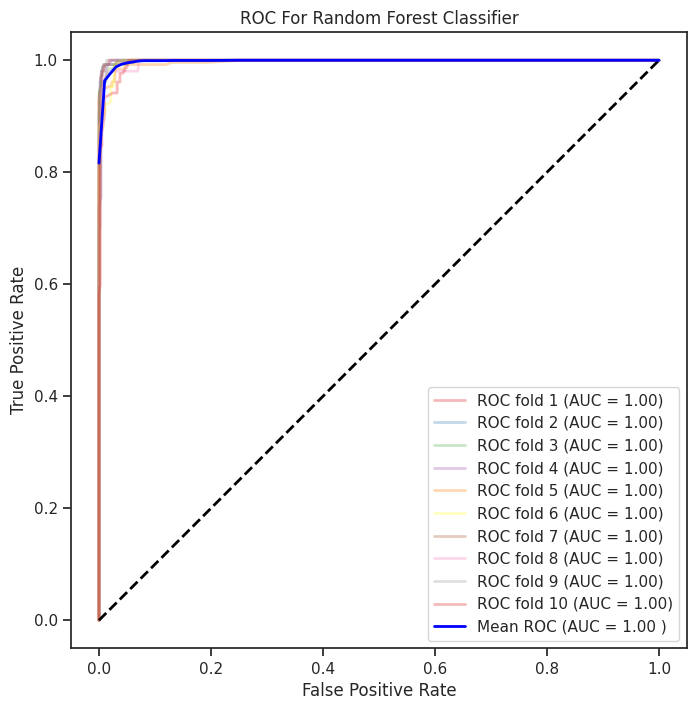

In [206]:
roc_plotting(rf, "Random Forest Classifier")

In [207]:
pickle.dump(rf, open('rf_model.pkl', 'wb'))

In [209]:
pickle.dump(sci_name_le, open('sci_name_le.pkl', 'wb'))
pickle.dump(com_name_le,open('com_name_le.pkl', 'wb'))
pickle.dump(state_le, open('state_le.pkl', 'wb'))
pickle.dump(county_le, open('county_le.pkl', 'wb'))
pickle.dump(loc_le, open('loc_le.pkl', 'wb'))
pickle.dump(par_spec_le, open('par_spec_le.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))